Credit Score Classification

In [695]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import ast
import numpy as np

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, ttest_ind

from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.tools import add_constant

In [696]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", 200)

Importing data and storing in a dataframe

In [697]:
data = pd.read_csv('credit-score-classification-cleaned-dataset/credit_score_cleaned_train.csv')
data.head()

id customer_id     month           name  age          ssn occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh   23  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265  Scientist   

   annual_income  monthly_inhand_salary  total_emi_per_month  \
0      19114.120               1824.843               49.575   
1      19114.120               1824.843               49.575   
2      19114.120               1824.843               49.575   
3      19114.120               1824.843               49.575   
4      19114.120               1824.843               49.575   

   num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
0                  3                4              3            4   
1                  3                4              3            4   
2                  3                4              3            4   
3                  3                4              3            4   
4                  3                4              3            4   

                                        type_of_loan  delay_from_due_date  \
0  ['Auto Loan', 'Credit-Builder Loan', 'Personal...                    3   
1  ['Auto Loan', 'Credit-Builder Loan', 'Personal...                   -1   
2  ['Auto Loan', 'Credit-Builder Loan', 'Personal...                    3   
3  ['Auto Loan', 'Credit-Builder Loan', 'Personal...                    5   
4  ['Auto Loan', 'Credit-Builder Loan', 'Personal...                    6   

   num_of_delayed_payment  changed_credit_limit  num_credit_inquiries  \
0                       7                11.270                     4   
1                       7                11.270                     4   
2                       7                11.270                     4   
3                       4                 6.270                     4   
4                       4                11.270                     4   

  credit_mix  outstanding_debt  credit_utilization_ratio  credit_history_age  \
0       Good           809.980                    26.823                 265   
1       Good           809.980                    31.945                 266   
2       Good           809.980                    28.609                 267   
3       Good           809.980                    31.378                 268   
4       Good           809.980                    24.797                 269   

  payment_of_min_amount  amount_invested_monthly  \
0                    No                   80.415   
1                    No                  118.280   
2                    No                   81.700   
3                    No                  199.458   
4                    No                   41.420   

                  payment_behaviour  monthly_balance  credit_score  
0   High_spent_Small_value_payments          312.494             2  
1    Low_spent_Large_value_payments          284.629             2  
2   Low_spent_Medium_value_payments          331.210             2  
3    Low_spent_Small_value_payments          223.451             2  
4  High_spent_Medium_value_payments          341.489             2

Exploratory Data Analysis

Looking at the attribute types

In [698]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_credit_card           100000 non-null  int64  
 12  interest_rate             100000 non-null  int64  
 13  num_of_loan               100000 non-null  in

Checking for null values

In [699]:
nullCounts = data.isnull().sum()
print(nullCounts)

id                          0
customer_id                 0
month                       0
name                        0
age                         0
ssn                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
total_emi_per_month         0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
type_of_loan                0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
credit_history_age          0
payment_of_min_amount       0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
dtype: int64


Checking for duplicates

In [700]:
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


Looking at the mean and standard deviations

In [701]:
data.describe().T

count      mean       std      min       25%  \
age                      100000.000    33.309    10.765   14.000    24.000   
annual_income            100000.000 50505.123 38299.422 7005.930 19342.972   
monthly_inhand_salary    100000.000  4198.772  3187.494  303.645  1626.762   
total_emi_per_month      100000.000   107.044   130.035    0.000    29.197   
num_bank_accounts        100000.000     5.369     2.593    0.000     3.000   
num_credit_card          100000.000     5.534     2.067    0.000     4.000   
interest_rate            100000.000    14.532     8.741    1.000     7.000   
num_of_loan              100000.000     3.533     2.446    0.000     2.000   
delay_from_due_date      100000.000    21.069    14.860   -5.000    10.000   
num_of_delayed_payment   100000.000    13.334     6.271    0.000     9.000   
changed_credit_limit     100000.000    10.389     6.790   -6.490     5.320   
num_credit_inquiries     100000.000     5.773     3.861    0.000     3.000   
outstanding_debt         100000.000  1426.220  1155.129    0.230   566.072   
credit_utilization_ratio 100000.000    32.285     5.117   20.000    28.053   
credit_history_age       100000.000   221.207    99.681    1.000   144.000   
amount_invested_monthly  100000.000   637.633  2043.334    0.000    74.594   
monthly_balance          100000.000   403.120   214.015    0.008   270.189   
credit_score             100000.000     0.888     0.675    0.000     0.000   

                               50%       75%        max  
age                         33.000    42.000     56.000  
annual_income            36999.705 71683.470 179987.280  
monthly_inhand_salary     3096.378  5961.745  15204.634  
total_emi_per_month         66.403   146.827   3776.000  
num_bank_accounts            5.000     7.000     11.000  
num_credit_card              5.000     7.000     11.000  
interest_rate               13.000    20.000     34.000  
num_of_loan                  3.000     5.000      9.000  
delay_from_due_date         18.000    28.000     67.000  
num_of_delayed_payment      14.000    18.000     28.000  
changed_credit_limit         9.400    14.860     36.970  
num_credit_inquiries         5.000     8.000     17.000  
outstanding_debt          1166.155  1945.963   4998.070  
credit_utilization_ratio    32.306    36.497     50.000  
credit_history_age         219.000   302.000    404.000  
amount_invested_monthly    135.952   266.178  10000.000  
monthly_balance            337.114   471.571   1602.041  
credit_score                 1.000     1.000      2.000

In [702]:
data.describe(include="object").T

count  unique                             top   freq
id                     100000  100000                          0x1602      1
customer_id            100000   12500                       CUS_0xd40      8
month                  100000       8                         January  12500
name                   100000   10139                          Langep     48
ssn                    100000   12500                     821-00-0265      8
occupation             100000      15                          Lawyer   7096
type_of_loan           100000    6261                     ['No Loan']  11408
credit_mix             100000       3                        Standard  45848
payment_of_min_amount  100000       2                             Yes  59432
payment_behaviour      100000       6  Low_spent_Small_value_payments  27588

Dropping id, name and ssn columns

In [703]:
columnsToDrop = ['id', 'name', 'ssn']
data = data.drop(columns=columnsToDrop)

Dropping customers that have ages lower than 18

In [704]:
filteredData = data[data['age'] < 18]
numCustomersToRemove = filteredData['customer_id'].nunique()
print(numCustomersToRemove)

788


In [705]:
customersToRemove = filteredData['customer_id'].unique()
data = data[~data['customer_id'].isin(customersToRemove)]
data['customer_id'].nunique()

11712

Dropping customers that have no bank accounts but have a monthly balance greater than 0

In [706]:
filteredData = data[(data['num_bank_accounts'] == 0) & (data['monthly_balance'] > 0)]
numCustomersToRemove = filteredData['customer_id'].nunique()

print(numCustomersToRemove)

563


In [707]:
customersToRemove = filteredData['customer_id'].unique()
data = data[~data['customer_id'].isin(customersToRemove)]
data['customer_id'].nunique()

11149

Checking if credit_history_age is lesser than the number of years from age 18 to current age of the customer

In [708]:
filteredData = data[(data['credit_history_age']//12) > (data['age']-18)]
print(filteredData[['age', 'credit_history_age']])
numCustomersToRemove = filteredData['customer_id'].nunique()
print(numCustomersToRemove)

       age  credit_history_age
0       23                 265
1       23                 266
2       23                 267
3       23                 268
4       23                 269
...    ...                 ...
99995   25                 378
99996   25                 379
99997   25                 380
99998   25                 381
99999   25                 382

[46537 rows x 2 columns]
5935


Dropping credit_history_age due to majority erroneous data

In [709]:
data = data.drop('credit_history_age', axis=1)
data.head()

customer_id     month  age occupation  annual_income  monthly_inhand_salary  \
0   CUS_0xd40   January   23  Scientist      19114.120               1824.843   
1   CUS_0xd40  February   23  Scientist      19114.120               1824.843   
2   CUS_0xd40     March   23  Scientist      19114.120               1824.843   
3   CUS_0xd40     April   23  Scientist      19114.120               1824.843   
4   CUS_0xd40       May   23  Scientist      19114.120               1824.843   

   total_emi_per_month  num_bank_accounts  num_credit_card  interest_rate  \
0               49.575                  3                4              3   
1               49.575                  3                4              3   
2               49.575                  3                4              3   
3               49.575                  3                4              3   
4               49.575                  3                4              3   

   num_of_loan                                       type_of_loan  \
0            4  ['Auto Loan', 'Credit-Builder Loan', 'Personal...   
1            4  ['Auto Loan', 'Credit-Builder Loan', 'Personal...   
2            4  ['Auto Loan', 'Credit-Builder Loan', 'Personal...   
3            4  ['Auto Loan', 'Credit-Builder Loan', 'Personal...   
4            4  ['Auto Loan', 'Credit-Builder Loan', 'Personal...   

   delay_from_due_date  num_of_delayed_payment  changed_credit_limit  \
0                    3                       7                11.270   
1                   -1                       7                11.270   
2                    3                       7                11.270   
3                    5                       4                 6.270   
4                    6                       4                11.270   

   num_credit_inquiries credit_mix  outstanding_debt  \
0                     4       Good           809.980   
1                     4       Good           809.980   
2                     4       Good           809.980   
3                     4       Good           809.980   
4                     4       Good           809.980   

   credit_utilization_ratio payment_of_min_amount  amount_invested_monthly  \
0                    26.823                    No                   80.415   
1                    31.945                    No                  118.280   
2                    28.609                    No                   81.700   
3                    31.378                    No                  199.458   
4                    24.797                    No                   41.420   

                  payment_behaviour  monthly_balance  credit_score  
0   High_spent_Small_value_payments          312.494             2  
1    Low_spent_Large_value_payments          284.629             2  
2   Low_spent_Medium_value_payments          331.210             2  
3    Low_spent_Small_value_payments          223.451             2  
4  High_spent_Medium_value_payments          341.489             2

Converting credit_mix to numerical data. (Bad -> 0, Standard -> 1, Good -> 2)

In [710]:
uniqueCreditMix = data['credit_mix'].unique()
print("Unique credit mix in the dataset:", sorted(uniqueCreditMix))

Unique credit mix in the dataset: ['Bad', 'Good', 'Standard']


In [711]:
creditMixMapping = {'Bad': 0, 'Standard': 1, 'Good': 2}
data['creditMixNum'] = data['credit_mix'].map(creditMixMapping)

print(data[['credit_mix', 'creditMixNum']].head())

  credit_mix  creditMixNum
0       Good             2
1       Good             2
2       Good             2
3       Good             2
4       Good             2


Converting payment_of_min_amount to numerical data (No -> 0, Yes -> 1)

In [712]:
uniquePaymentMinAmt = data['payment_of_min_amount'].unique()
print("Unique payment of min amount in the dataset:", sorted(uniquePaymentMinAmt))

Unique payment of min amount in the dataset: ['No', 'Yes']


In [713]:
PaymentMinAmtMapping = {'No': 0, 'Yes': 1}
data['paymentMinAmountNum'] = data['payment_of_min_amount'].map(PaymentMinAmtMapping)

print(data[['payment_of_min_amount', 'paymentMinAmountNum']].head())

  payment_of_min_amount  paymentMinAmountNum
0                    No                    0
1                    No                    0
2                    No                    0
3                    No                    0
4                    No                    0


Converting type_of_loan entries from string to list of strings to make it usable

In [714]:
data['type_of_loan'] = data['type_of_loan'].apply(ast.literal_eval)

Checking if num_of_loans matches with the length of type of loans taken

In [715]:
def countValidLoans(loanList):
    count = 0
    for loan in loanList:
        if loan != 'No Loan':
            count += 1
    return count

mismatchedRows = data[data['num_of_loan'] != data['type_of_loan'].apply(countValidLoans)]

print(f"Number of rows with mismatched loan counts: {len(mismatchedRows)}")

Number of rows with mismatched loan counts: 0


One hot encoding the type of loans

In [716]:
oneHotEncoded = data['type_of_loan'].str.join('|').str.get_dummies()
loanTypes = oneHotEncoded.columns.tolist()
print(loanTypes)

if 'Auto Loan' not in data.columns:
    data = pd.concat([data, oneHotEncoded], axis=1)

data.head()

['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan', 'No Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']


customer_id     month  age occupation  annual_income  monthly_inhand_salary  \
0   CUS_0xd40   January   23  Scientist      19114.120               1824.843   
1   CUS_0xd40  February   23  Scientist      19114.120               1824.843   
2   CUS_0xd40     March   23  Scientist      19114.120               1824.843   
3   CUS_0xd40     April   23  Scientist      19114.120               1824.843   
4   CUS_0xd40       May   23  Scientist      19114.120               1824.843   

   total_emi_per_month  num_bank_accounts  num_credit_card  interest_rate  \
0               49.575                  3                4              3   
1               49.575                  3                4              3   
2               49.575                  3                4              3   
3               49.575                  3                4              3   
4               49.575                  3                4              3   

   num_of_loan                                       type_of_loan  \
0            4  [Auto Loan, Credit-Builder Loan, Personal Loan...   
1            4  [Auto Loan, Credit-Builder Loan, Personal Loan...   
2            4  [Auto Loan, Credit-Builder Loan, Personal Loan...   
3            4  [Auto Loan, Credit-Builder Loan, Personal Loan...   
4            4  [Auto Loan, Credit-Builder Loan, Personal Loan...   

   delay_from_due_date  num_of_delayed_payment  changed_credit_limit  \
0                    3                       7                11.270   
1                   -1                       7                11.270   
2                    3                       7                11.270   
3                    5                       4                 6.270   
4                    6                       4                11.270   

   num_credit_inquiries credit_mix  outstanding_debt  \
0                     4       Good           809.980   
1                     4       Good           809.980   
2                     4       Good           809.980   
3                     4       Good           809.980   
4                     4       Good           809.980   

   credit_utilization_ratio payment_of_min_amount  amount_invested_monthly  \
0                    26.823                    No                   80.415   
1                    31.945                    No                  118.280   
2                    28.609                    No                   81.700   
3                    31.378                    No                  199.458   
4                    24.797                    No                   41.420   

                  payment_behaviour  monthly_balance  credit_score  \
0   High_spent_Small_value_payments          312.494             2   
1    Low_spent_Large_value_payments          284.629             2   
2   Low_spent_Medium_value_payments          331.210             2   
3    Low_spent_Small_value_payments          223.451             2   
4  High_spent_Medium_value_payments          341.489             2   

   creditMixNum  paymentMinAmountNum  Auto Loan  Credit-Builder Loan  \
0             2                    0          1                    1   
1             2                    0          1                    1   
2             2                    0          1                    1   
3             2                    0          1                    1   
4             2                    0          1                    1   

   Debt Consolidation Loan  Home Equity Loan  Mortgage Loan  No Loan  \
0                        0                 1              0        0   
1                        0                 1              0        0   
2                        0                 1              0        0   
3                        0                 1              0        0   
4                        0                 1              0        0   

   Not Specified  Payday Loan  Personal Loan  Student Loan  
0              0            0              1      

Getting count of the different types of loan in each credit score

In [717]:
loanDict = {}

for creditScore in data['credit_score'].unique():
    creditScoreData = data[data['credit_score'] == creditScore]
    loanTypeCounts = {}
    for loanType in loanTypes:
        loanTypeCounts[loanType] = creditScoreData[loanType].sum()
    loanDict[creditScore] = loanTypeCounts

print(loanDict)

{2: {'Auto Loan': 3100, 'Credit-Builder Loan': 3509, 'Debt Consolidation Loan': 3179, 'Home Equity Loan': 3408, 'Mortgage Loan': 3405, 'No Loan': 3013, 'Not Specified': 3524, 'Payday Loan': 3412, 'Personal Loan': 3174, 'Student Loan': 3338}, 1: {'Auto Loan': 13770, 'Credit-Builder Loan': 14345, 'Debt Consolidation Loan': 14267, 'Home Equity Loan': 14190, 'Mortgage Loan': 14012, 'No Loan': 6137, 'Not Specified': 14123, 'Payday Loan': 14438, 'Personal Loan': 14322, 'Student Loan': 13643}, 0: {'Auto Loan': 10258, 'Credit-Builder Loan': 10370, 'Debt Consolidation Loan': 10146, 'Home Equity Loan': 10186, 'Mortgage Loan': 10399, 'No Loan': 1130, 'Not Specified': 10409, 'Payday Loan': 10582, 'Personal Loan': 10216, 'Student Loan': 10403}}


In [718]:
flattenedData = []

for creditScore, loans in loanDict.items():
    for loan, count in loans.items():
        flattenedData.append({
            'credit_score': creditScore,
            'loan_type': loan,
            'loan_count': count
        })

loanData = pd.DataFrame(flattenedData)

print(loanData)

    credit_score                loan_type  loan_count
0              2                Auto Loan        3100
1              2      Credit-Builder Loan        3509
2              2  Debt Consolidation Loan        3179
3              2         Home Equity Loan        3408
4              2            Mortgage Loan        3405
5              2                  No Loan        3013
6              2            Not Specified        3524
7              2              Payday Loan        3412
8              2            Personal Loan        3174
9              2             Student Loan        3338
10             1                Auto Loan       13770
11             1      Credit-Builder Loan       14345
12             1  Debt Consolidation Loan       14267
13             1         Home Equity Loan       14190
14             1            Mortgage Loan       14012
15             1                  No Loan        6137
16             1            Not Specified       14123
17             1            

Looking at the unique credit score values

In [719]:
uniqueScores = data['credit_score'].unique()
print("Unique credit scores in the dataset:", sorted(uniqueScores))

Unique credit scores in the dataset: [0, 1, 2]


There are three possible credit scores classes. 0 which referes to Poor, 1 which referes to Standard and 2 which refers to Good.

Evaluating distribution of Credit Scores

In [720]:
scoreCounts = data['credit_score'].value_counts()
scorePercentages = data['credit_score'].value_counts(normalize=True) * 100
scoreSummary = pd.DataFrame({
    'Count': scoreCounts,
    'Percentage (%)': scorePercentages
})

print("Credit score counts and percentages:\n", scoreSummary.sort_index())

Credit score counts and percentages:
    Count  Percentage (%)
0  25361          28.434
1  48214          54.056
2  15617          17.509


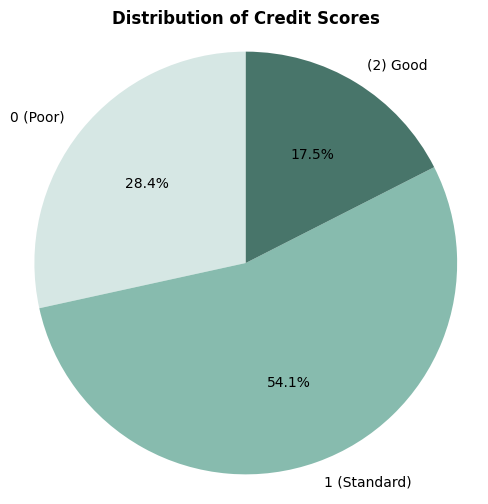

In [721]:
plt.figure(figsize=(6, 6))
plt.pie(scoreCounts.sort_index(), labels=['0 (Poor)', '1 (Standard)', '(2) Good'], autopct='%1.1f%%', startangle=90, colors=['#d6e7e4', '#87bbae', '#48756a'])
plt.title("Distribution of Credit Scores", fontsize=12, fontweight="bold")
plt.axis('equal')
plt.show()

Data is slightly unbalanced with the majority class being Standard (1) with 54.1%, followed by Poor (0) with 28.4% and then Good (2) with 17.5%.

Count of unique customers

In [722]:
uniqueCustomers = data['customer_id'].nunique()
print(f"Number of unique customer IDs: {uniqueCustomers}")

Number of unique customer IDs: 11149


After initial data preparation, the dataset contains data on 11149 customers.

Looking at the unique month values

In [723]:
uniqueMonths = data['month'].unique()
print("Unique months in the dataset:", uniqueMonths)

Unique months in the dataset: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


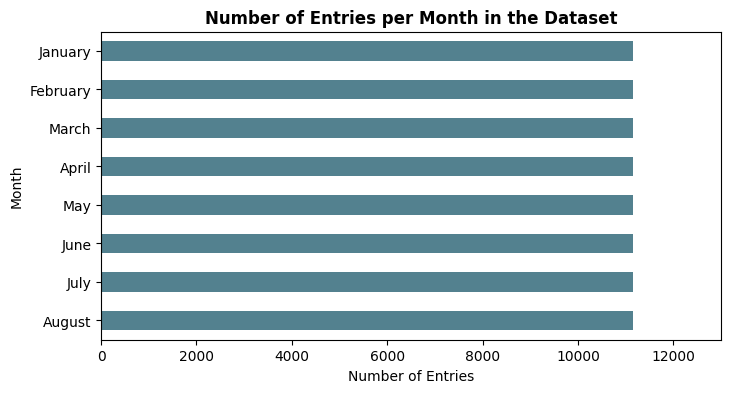

In [724]:
monthCounts = data['month'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(
    x=monthCounts.values, 
    y=monthCounts.index, 
    color='#498699',
    width=0.5)

plt.xlim(0, 13000)
plt.xlabel("Number of Entries")
plt.ylabel("Month")
plt.title("Number of Entries per Month in the Dataset", fontsize=12, fontweight="bold")
# sns.despine(left=True)
plt.show()

We have data for each customer over 8 months from January to August.

<Figure size 1000x600 with 0 Axes>

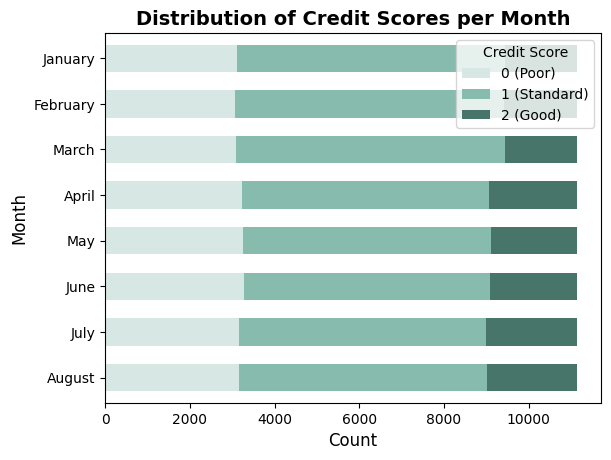

In [725]:
monthOrder = ['August', 'July', 'June', 'May', 'April', 'March', 'February', 'January']
data['orderedMonth'] = pd.Categorical(data['month'], categories=monthOrder)

monthScoreDistribution = data.groupby(['orderedMonth', 'credit_score']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
monthScoreDistribution.plot(kind='barh', stacked=True, width=0.6, color=['#d6e7e4', '#87bbae', '#48756a'])

plt.title("Distribution of Credit Scores per Month", fontsize=14, fontweight="bold")
plt.xlabel("Count", fontsize=12)
plt.ylabel("Month", fontsize=12)

plt.legend(labels=["0 (Poor)", "1 (Standard)", "2 (Good)"], title="Credit Score", loc="upper right")
# sns.despine(left=True)
plt.show()

The distribution of credit scores is similar for every month. Standard has the highest percentage of credit scores across every month followed by Poor and then Good.

Checking if the customer credit score remains same or varies across the 8 months (January-August)

In [726]:
creditScoreVariability = data.groupby('customer_id')['credit_score'].nunique()
varyingCreditScores = creditScoreVariability[creditScoreVariability > 1]

print(f"Number of customers with varying credit scores: {len(varyingCreditScores)}")

Number of customers with varying credit scores: 6424


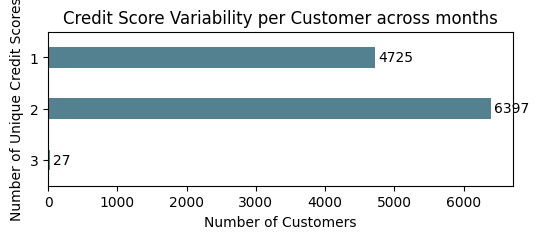

In [727]:
variabilityCounts = creditScoreVariability.value_counts().sort_index()

plt.figure(figsize=(6, 2))

sns.barplot(
    x=variabilityCounts.values,    
    y=variabilityCounts.index.astype(str),
    color='#498699',
    width=0.4
)

for index, value in enumerate(variabilityCounts.values):
    plt.text(value + 50, index, str(value), va='center', ha='left', fontsize=10)
    
plt.title("Credit Score Variability per Customer across months", fontsize=12)
plt.ylabel("Number of Unique Credit Scores", fontsize=10)
plt.xlabel("Number of Customers", fontsize=10)

# sns.despine(left=True)
plt.show()

4725 customers maintain same credit score across the 8 months whereas 6397 customers go from one score to another and 27 customers change across all three credit scores.

Univariate Analysis of Numerical Variables

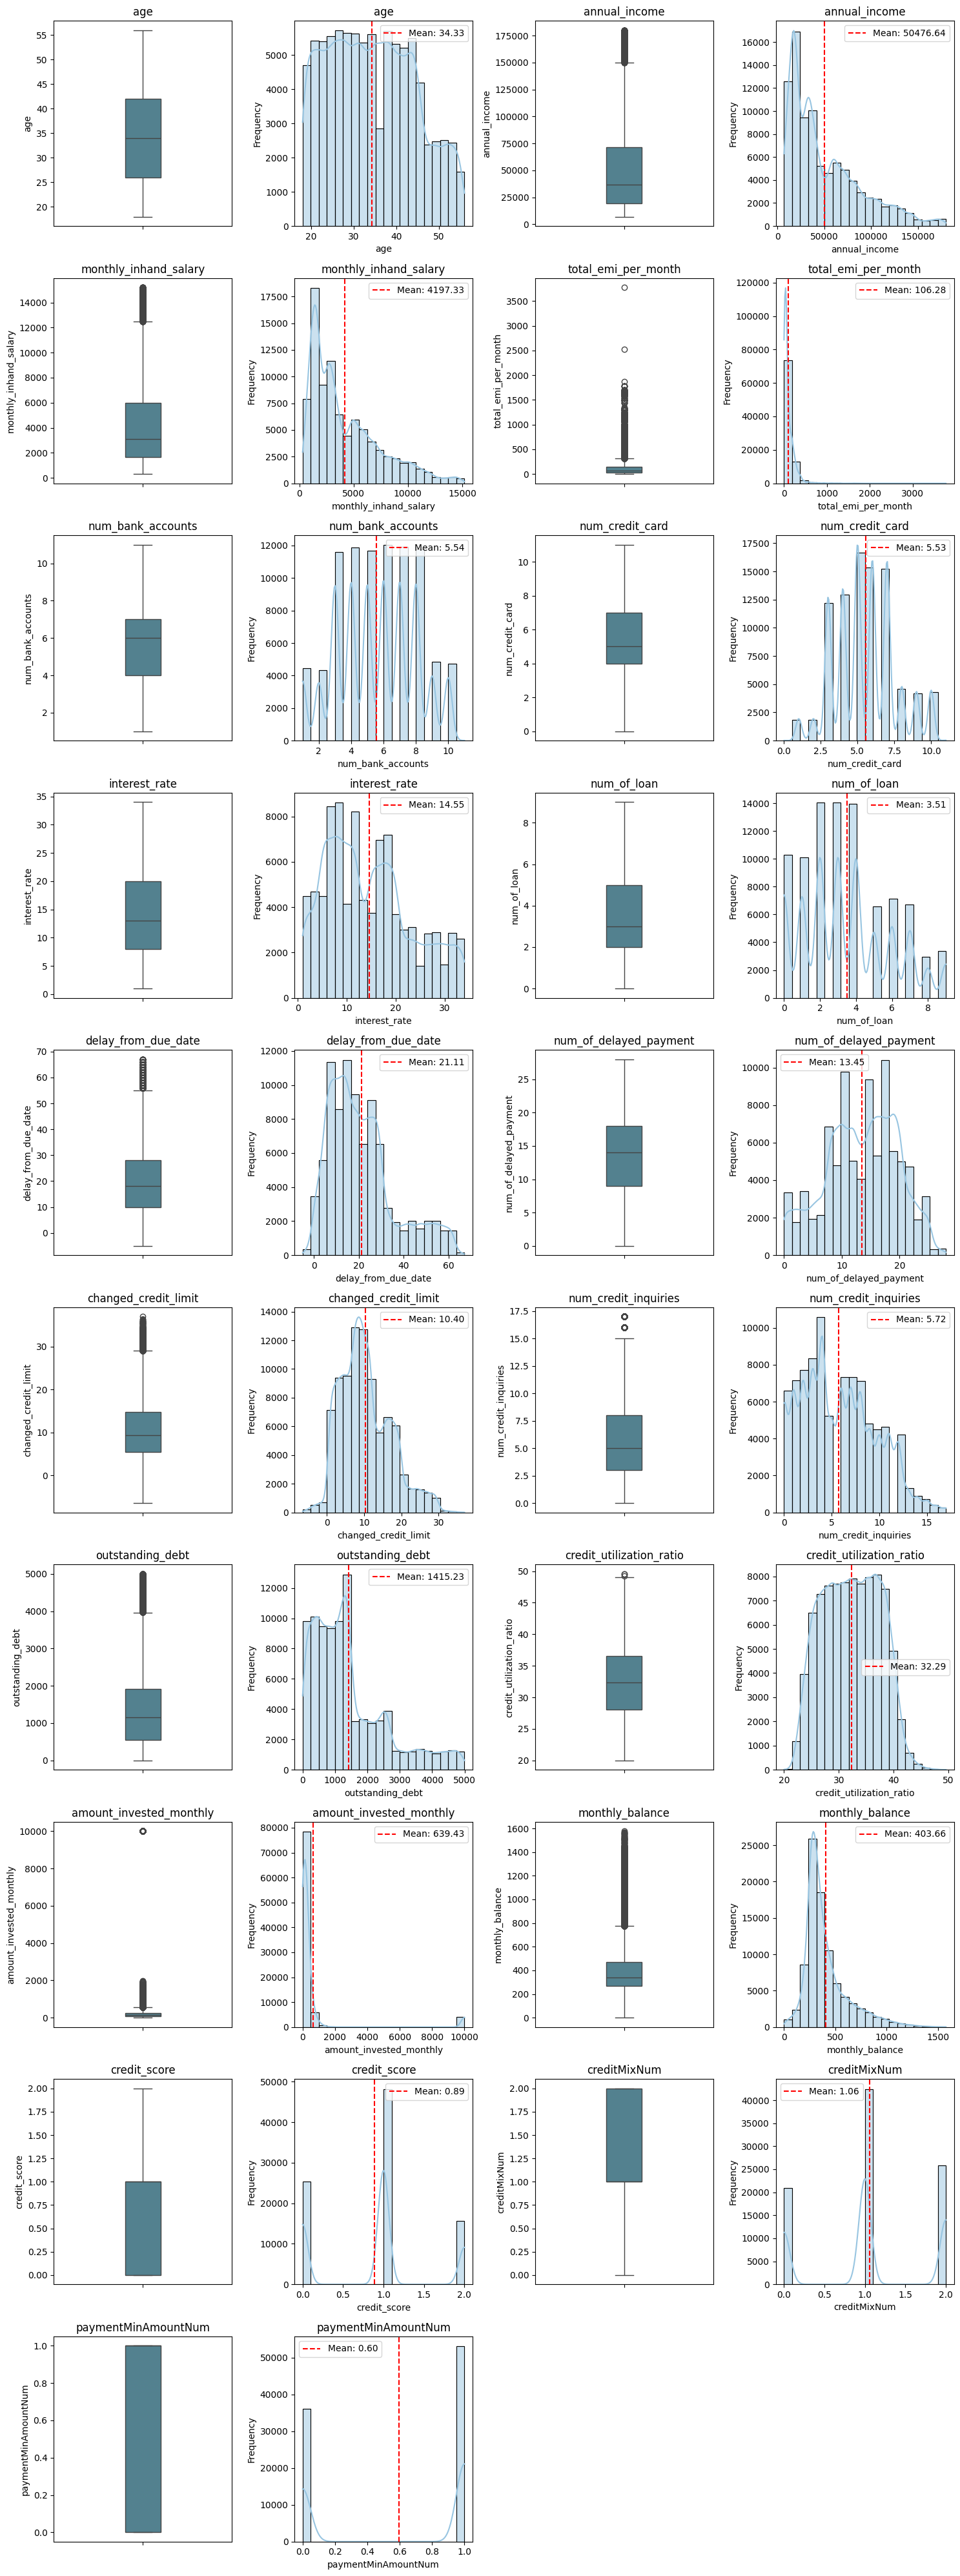

In [728]:
numericColumns = data.select_dtypes(include='number').columns
numericColumns = [col for col in numericColumns if col not in loanTypes]

numPlots = len(numericColumns)
rows = (numPlots // 2) + 1
cols = 4  

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()


for i, col in enumerate(numericColumns):
  
    sns.boxplot(data=data, y=col, ax=axes[2 * i], color="#498699",  width=0.2)
    axes[2 * i].set_title(f'{col}', fontsize=12)
    # axes[2 * i].set_xlabel(col, fontsize=10)
    axes[2 * i].set_ylabel(col, fontsize=10)

    sns.histplot(data=data, x=col, ax=axes[2 * i + 1], color="#98c5e1", kde=True, bins=20)
    mean_value = data[col].mean()
    axes[2 * i + 1].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[2 * i + 1].legend()

    axes[2 * i + 1].set_title(f'{col}', fontsize=12)
    axes[2 * i + 1].set_xlabel(col, fontsize=10)
    axes[2 * i + 1].set_ylabel('Frequency', fontsize=10)


for j in range(2 * numPlots, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.tight_layout()
plt.show()

Variables such as age, num_bank_accounts, num_credit_card, num_of_delayed_payments, changed_credit_limit, credit_utlization_ratio and credit_history_age are somewhat normally distributed with their means close to the centre. Interest_rate, num_of_loans, delay_from_due_date, num_credit_inquiries are slightly right-skewed. Variables annual_income, monthly_inhand_salary, total_emi_per_month, outstanding_debt, amount_invested_monthly and monthly_balance are heavily right skewed. Total_emi_per_month and amount_invested_monthly have outliers which we will remove.

Removing outliers from total_emi_per_month and amount_invested_monthly

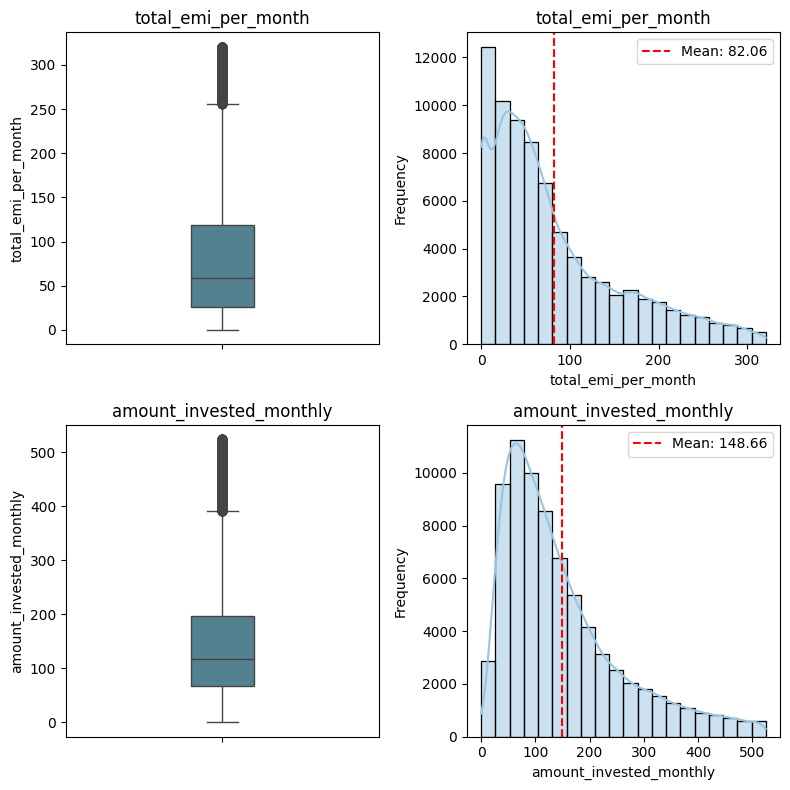

In [729]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data = remove_outliers(data, 'total_emi_per_month')
data = remove_outliers(data, 'amount_invested_monthly')

columnsToPlot = ['total_emi_per_month', 'amount_invested_monthly']

rows = 2
cols = 2  
fig, axes = plt.subplots(rows, cols, figsize=(8, rows * 4))
axes = axes.flatten()


for i, col in enumerate(columnsToPlot):
  
    sns.boxplot(data=data, y=col, ax=axes[2 * i], color="#498699",  width=0.2)
    axes[2 * i].set_title(f'{col}', fontsize=12)
    # axes[2 * i].set_xlabel(col, fontsize=10)
    axes[2 * i].set_ylabel(col, fontsize=10)

    sns.histplot(data=data, x=col, ax=axes[2 * i + 1], color="#98c5e1", kde=True, bins=20)
    mean_value = data[col].mean()
    axes[2 * i + 1].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[2 * i + 1].legend()

    axes[2 * i + 1].set_title(f'{col}', fontsize=12)
    axes[2 * i + 1].set_xlabel(col, fontsize=10)
    axes[2 * i + 1].set_ylabel('Frequency', fontsize=10)


for j in range(2 * 2, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.tight_layout()
plt.show()


In [730]:
uniqueCustomers = data['customer_id'].nunique()
print(f"Number of unique customer IDs: {uniqueCustomers}")

Number of unique customer IDs: 10720


After removing outliers, the dataset contains 10720 customers.

Univariate Analysis of Categorical Variables


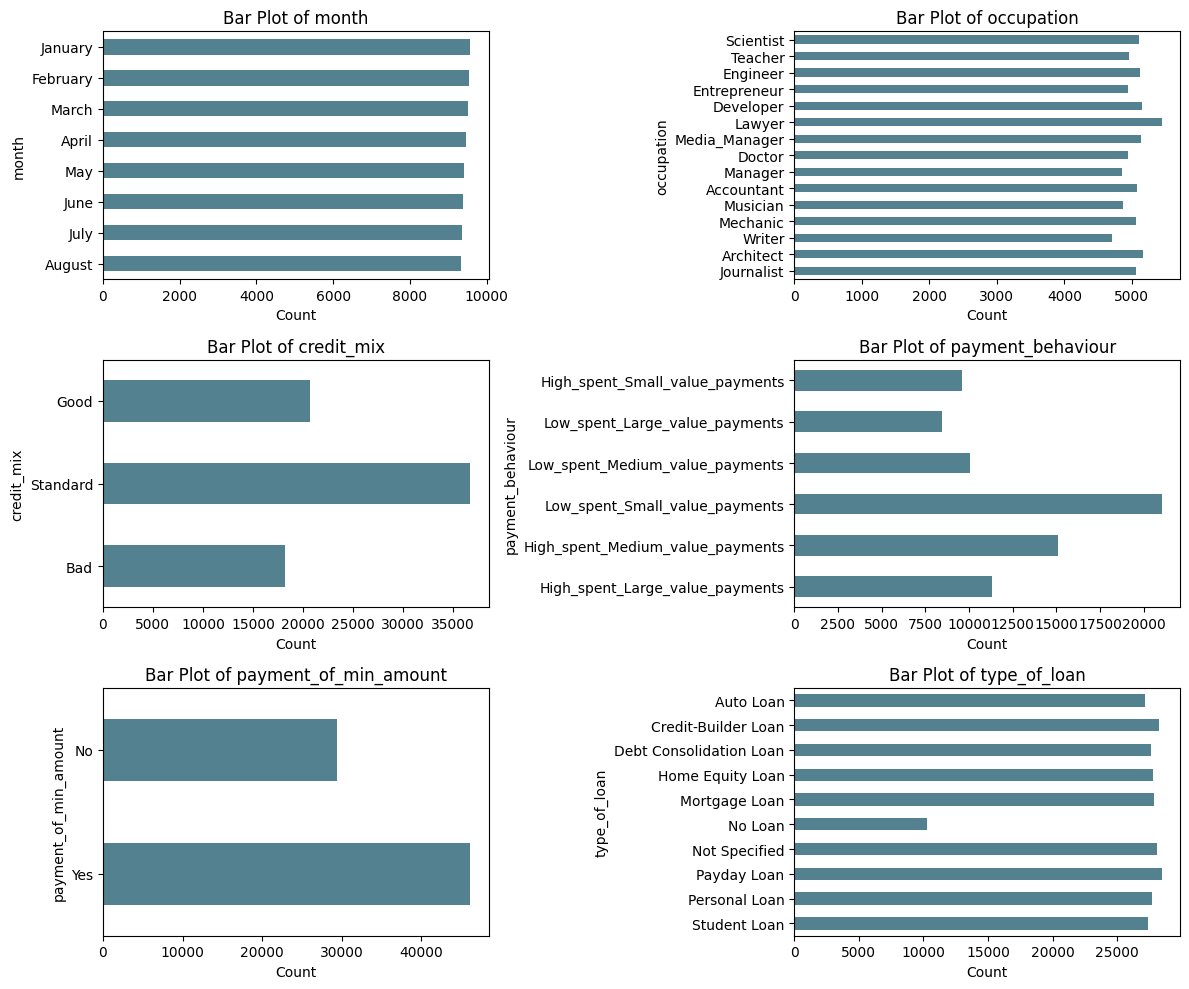

In [731]:
categoricalColumns = ['month', 'occupation', 'credit_mix', 'payment_behaviour', 'payment_of_min_amount']

dataFiltered = data[categoricalColumns]

numPlots = len(categoricalColumns)
rows = (numPlots // 2) + 1
cols = 2  

fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(categoricalColumns):
    sns.countplot(data=dataFiltered, y=col, ax=axes[i], color='#498699', width=0.5, legend=False, orient='h')
    axes[i].set_title(f'Bar Plot of {col}', fontsize=12)
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].set_xlabel('Count', fontsize=10)

loanTypeCounts = loanData.groupby('loan_type')['loan_count'].sum().reset_index()

sns.barplot(x='loan_count', y='loan_type', data=loanTypeCounts, ax=axes[numPlots], color='#498699', width=0.5)
axes[numPlots].set_title('Bar Plot of type_of_loan', fontsize=12)
axes[numPlots].set_xlabel('Count', fontsize=10)
axes[numPlots].set_ylabel('type_of_loan', fontsize=10)

for j in range(numPlots+1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.tight_layout()
plt.show()

There is an almost even distribution in occupation and type_of_loan (except for no loan). In credit_mix, standard has the highest count whereas in payment_behaviour, low_spent_small_value_payments has the highest count. In payment_of_min_amount, Yes is the majority class which means that most of the times, customers paid just the minimum amount required for that month.

Comparing relationship between numerical columns and credit scores

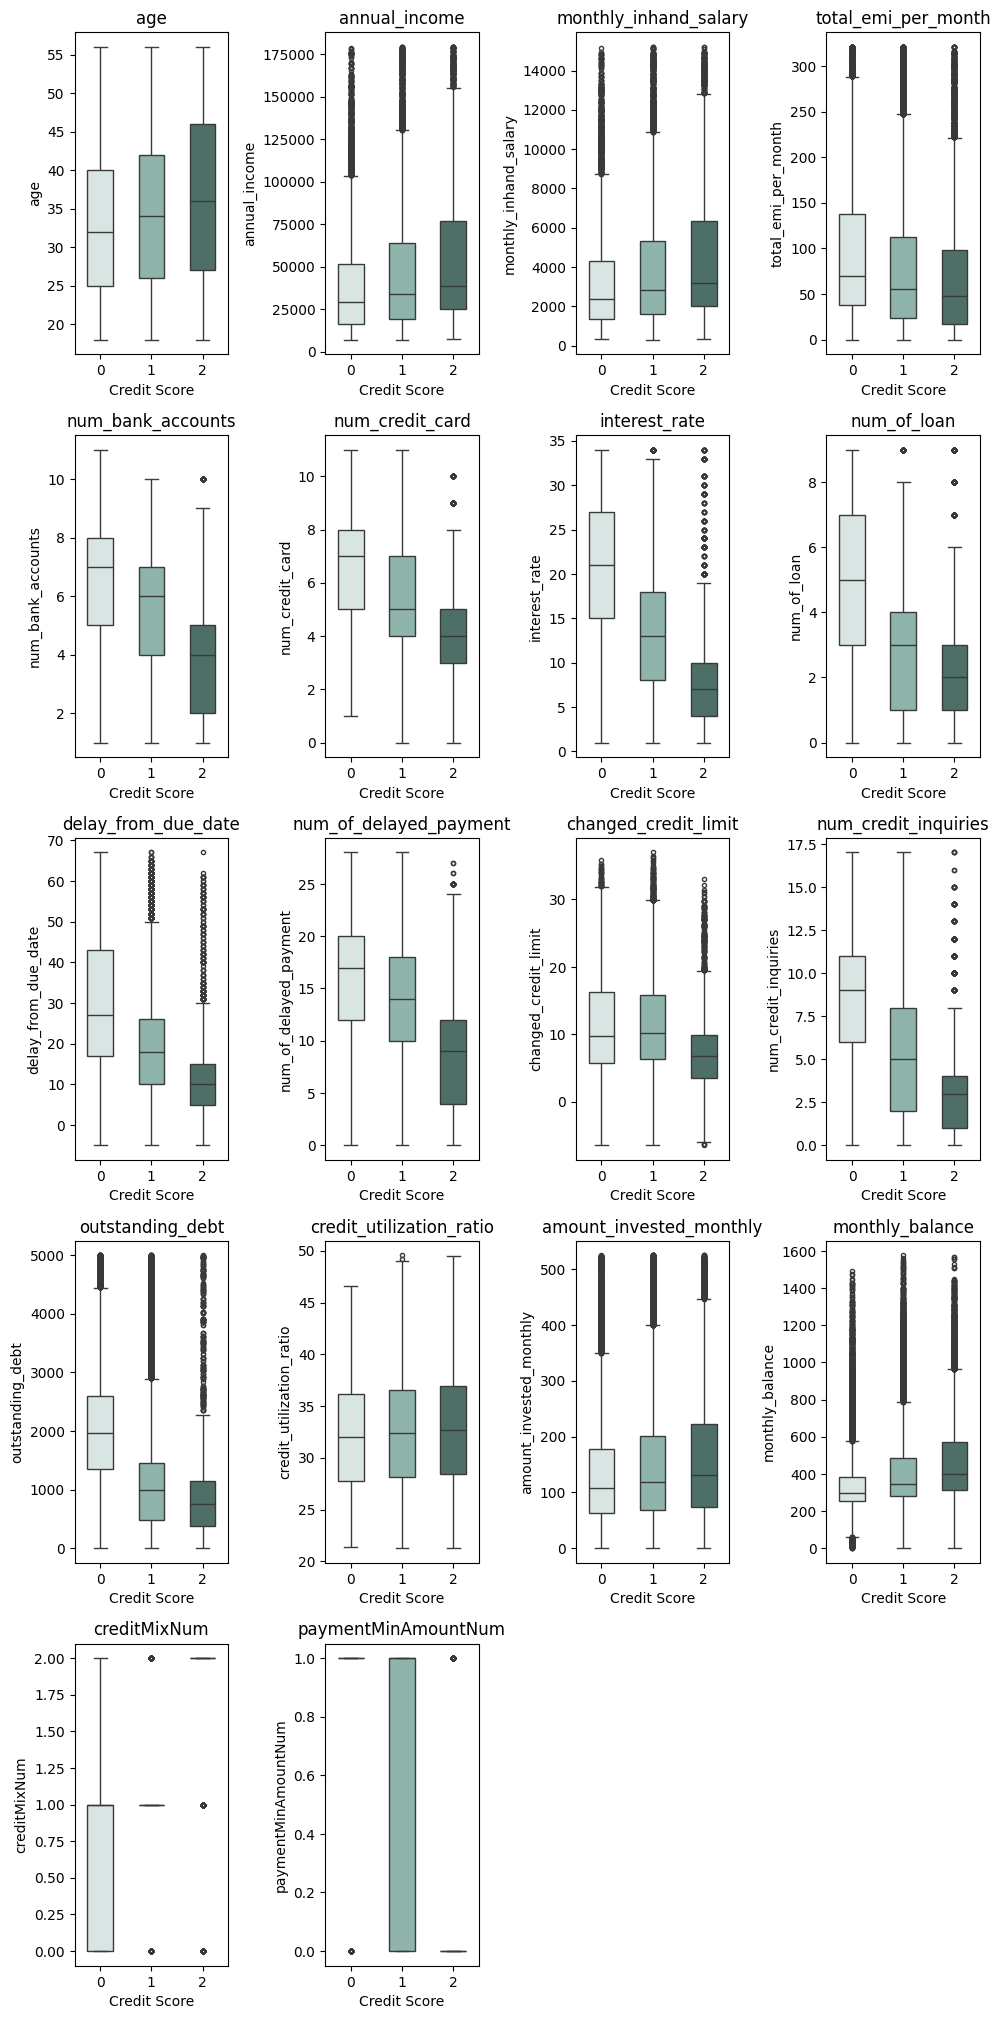

In [732]:
numericColumns = data.select_dtypes(include='number').columns.drop('credit_score')
numericColumns = [col for col in numericColumns if col not in loanTypes]
customPalette = {0: "#d6e7e4", 1: "#87bbae", 2: "#48756a"}
flierprops = dict(markersize=3)

numPlots = len(numericColumns)
nCols = 4
nRows = (numPlots // 2) + 1

fig, axes = plt.subplots(nRows, nCols, figsize=(10, nRows * 4))
axes=axes.flatten()

for i, col in enumerate(numericColumns):
    sns.boxplot(data=data, x='credit_score', y=col, ax=axes[i], hue='credit_score', palette=customPalette, width=0.5, legend=False, flierprops=flierprops)
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('Credit Score')
    axes[i].set_ylabel(col)

for j in range(numPlots, len(axes)):
    axes[j].set_visible(False)

plt.subplots_adjust(hspace=0.4, wspace=5)
plt.tight_layout()
plt.show()

The mean values of age, annual_income, monthly_in_hand salary, credit_history_age and monthly_balance increases as the credit score increase. Whereas the mean values of num_bank_accounts, num_credit_card, interest_rate, num_of_loan, delay_from_due_date (in days), num_of_delayed_payments, num_credi_inquiries, outstanding_debt decreases as the crdit score increase. For changed_credit_limit and credit_utilization_ratio the mean values relatively stay the same across the credi scores. It is difficult to determine the realtionship for total_emi_per_month and amount_invested_monthly due to outliers.

Comparing distribution of numerical columns in each credit score

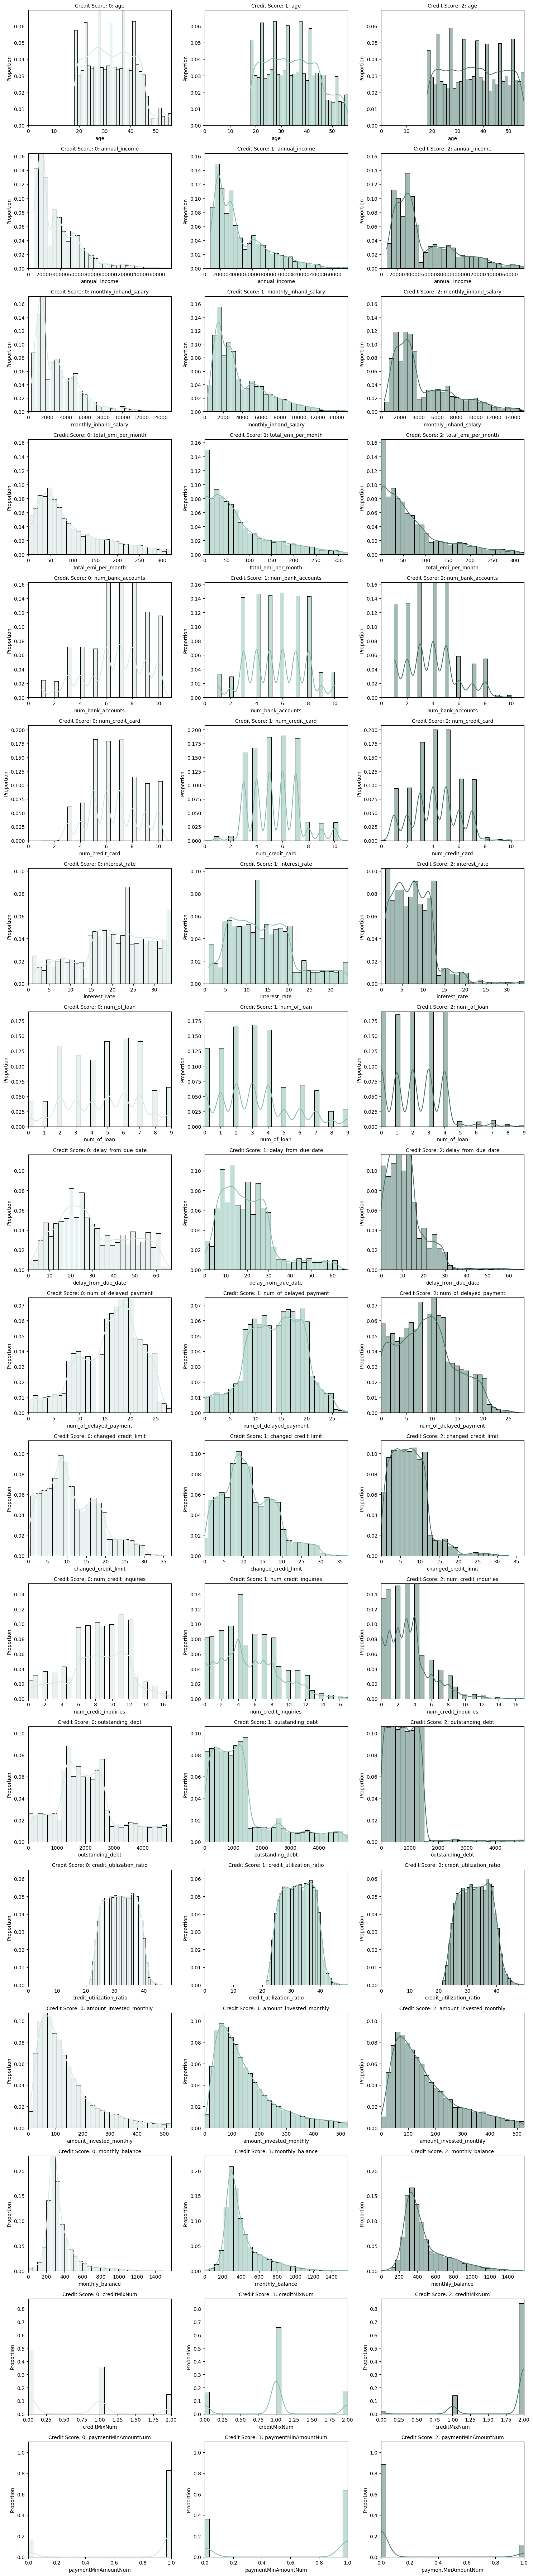

In [733]:
creditScores = {0: "Credit Score: 0", 1: "Credit Score: 1", 2: "Credit Score: 2"}

globalXLimits = {}
globalYLimits = {}

for i, col in enumerate(numericColumns):
    xMax = data[col].max()
    yMax = 0
    yMaxPercent = 0
    _, bins, _ = plt.hist(data[col], bins=30)
    plt.close()
    
    for score in creditScores.keys():
        counts = [0] * (len(bins) - 1)
        for i in range(len(bins) - 1):
            counts[i] = sum(
                (data[data['credit_score'] == score][col] >= bins[i]) &
                (data[data['credit_score'] == score][col] < bins[i + 1])
            )
        if yMax < max(counts):
            yMax = max(counts)
            yMaxPercent = yMax/sum(counts)

        # yMax = max(yMax, max(counts))

    buffer = yMaxPercent*0.1
    globalXLimits[col] = (0, xMax)
    globalYLimits[col] = (0, yMaxPercent+buffer)


nCols = 3 
nRows = len(numericColumns)
fig, axes = plt.subplots(nRows, nCols, figsize=(15, nRows * 4))
axes = axes.reshape(nRows, nCols)

for i, col in enumerate(numericColumns):
    for j, score in enumerate(creditScores.keys()):
        sns.histplot(
            data=data[data['credit_score'] == score],
            x=col,
            kde=True,
            stat="probability",
            color={0: '#d6e7e4', 1: '#87bbae', 2: '#48756a'}[score],
            ax=axes[i, j],
            bins=30
        )
        axes[i, j].set_title(f'{creditScores[score]}: {col}', fontsize=10)
        axes[i, j].set_ylabel('Proportion')
        axes[i, j].set_xlabel(col)

        axes[i, j].set_xlim(globalXLimits[col])
        axes[i, j].set_ylim(globalYLimits[col])

plt.tight_layout()
plt.show()

Out of all the customers with a good credit score, there is a higher proportion of customers above the age of 45 as compared to the customers with a poor and standard credit score. Moreover, a greater proportion of customers with a good credit have fewer bank accounts as compared to the ones with a poor and standard score. A greater proportion of customers with a good credit score have a lower interest rate as compared to the ones with a poor and standard score but this may be because they are eligible for lower interest rates. A large proportion of good credit score customers also take fewer loans. They also have shorter delays from the due date and lesser delayed payments as well. Moreover, almost all of the customers with a good credit score have either no outstanding debt or debt less than 1500 whereas customers with a standard or poor credit score do have higher outstanding debts. Credit utilization rate is similar across the credit scores. However, a greater proportion of customers with a good credit score have a longer credit history age as compared to the other customers.

Comparing relationship between categorical columns and credit scores

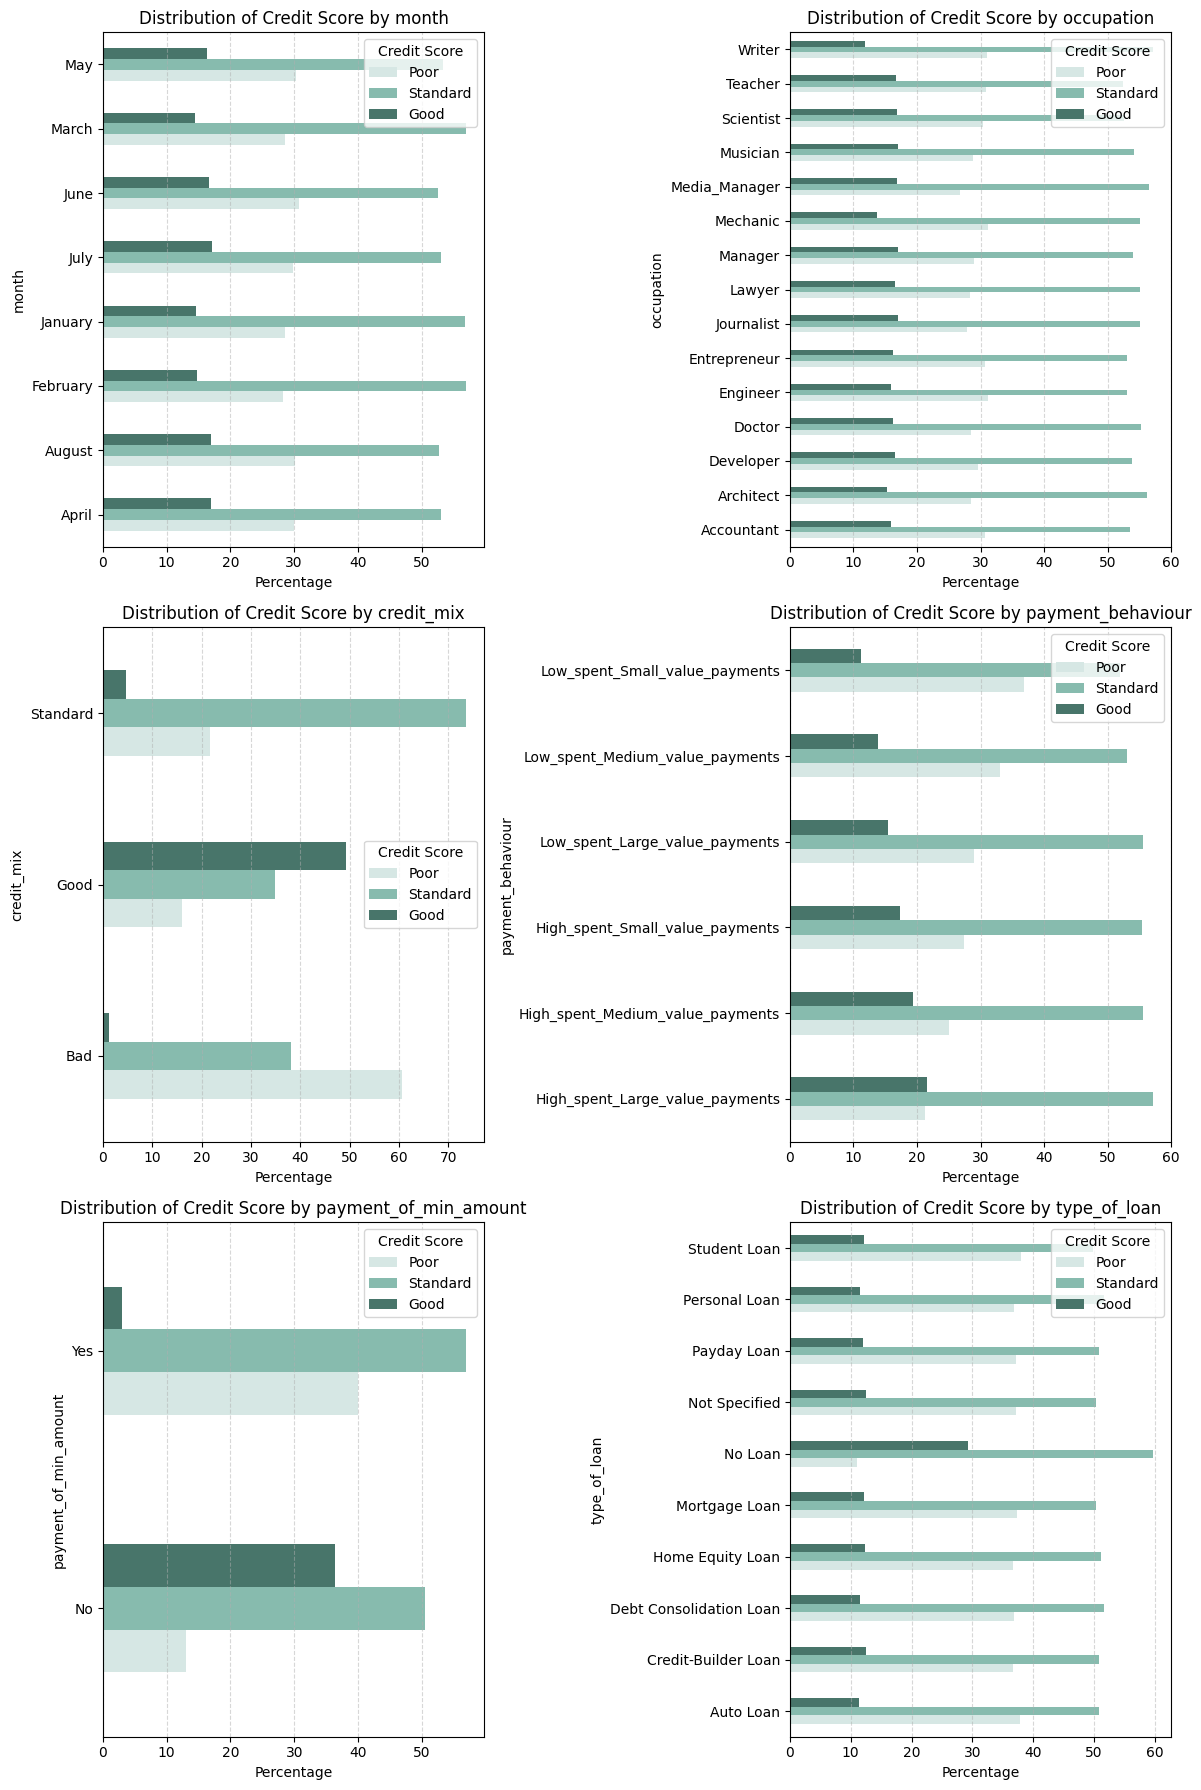

In [734]:
categoricalColumns = ['month', 'occupation', 'credit_mix', 'payment_behaviour', 'payment_of_min_amount']
dataFiltered = data[categoricalColumns]
customPalette = {0: "#d6e7e4", 1: "#87bbae", 2: "#48756a"}

numPlots = len(categoricalColumns)
nCols = 2
nRows = (numPlots + 1) // nCols

fig, axes = plt.subplots(nRows, nCols, figsize=(12, nRows * 6))
axes = axes.flatten()

for i, col in enumerate(categoricalColumns):
    cross_tab = pd.crosstab(data[col], data['credit_score'], normalize='index') * 100
    cross_tab.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], ax=axes[i])  
    axes[i].set_title(f'Distribution of Credit Score by {col}', fontsize=12)
    axes[i].set_xlabel('Percentage')
    axes[i].set_ylabel(col)
    axes[i].legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
    axes[i].grid(True, axis='x', linestyle='--', alpha=0.5) 

loanDataSum = loanData.groupby('loan_type')['loan_count'].sum()
loanDataPercentage = loanData.pivot_table(index='loan_type', columns='credit_score', values='loan_count', aggfunc='sum')
loanDataPercentage = loanDataPercentage.div(loanDataSum, axis=0) * 100
loanDataPercentage.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], ax=axes[numPlots])
axes[numPlots].set_title('Distribution of Credit Score by type_of_loan', fontsize=12)
axes[numPlots].set_xlabel('Percentage')
axes[numPlots].set_ylabel('type_of_loan')
axes[numPlots].legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
axes[numPlots].grid(True, axis='x', linestyle='--', alpha=0.5) 

# for i, col in enumerate(categoricalColumns):
#     sns.countplot(data=data, y=col, hue='credit_score', ax=axes[i], palette=customPalette)
#     axes[i].set_title(f'Distribution of Credit Score by {col}', fontsize=12)
#     axes[i].set_ylabel(col)
#     axes[i].set_xlabel('Count')

# sns.barplot(data=loanData, y='loan_type', x='loan_count', hue='credit_score', ax=axes[numPlots], palette=customPalette)
# axes[numPlots].set_title('Distribution of Credit Score by type_of_loan', fontsize=12)
# axes[numPlots].set_ylabel('type_of_loan')
# axes[numPlots].set_xlabel('Count')

for j in range(numPlots+1, len(axes)):
    axes[j].set_visible(False)


plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()


Distribution of credit score across month, occupation, payment_behaviour and type_of_loan is similar in which 1 (standard) is the majority in every class followed by 0 (poor) and then 2 (good). However in the No Loan class in type_of_loan, 1 (standard) is follwed by 2 (good) which are higher than 0 (poor). In credit_mix, the majority class relates to the credit score. In Good credit mix, the majority class is 2 (good), in Standard credit mix, the majority class is 1 (standard) whereas in Bad credit mix, the majority class is 0 (poor). In payment_of_min_amount, customers who did not pay just the minimum amount have a majority of 1 (standard) credit scores, closely followed by 2 (good) credit scores and a few 0 (poor) credit scores. However, those who paid just the minimum amount, also have a majority of 1 (standard) credit scores but followed by 0 (poor) credit scores and with a very few 2 (good) credit scores.

Checking the distribution of credit_mix within each credit score

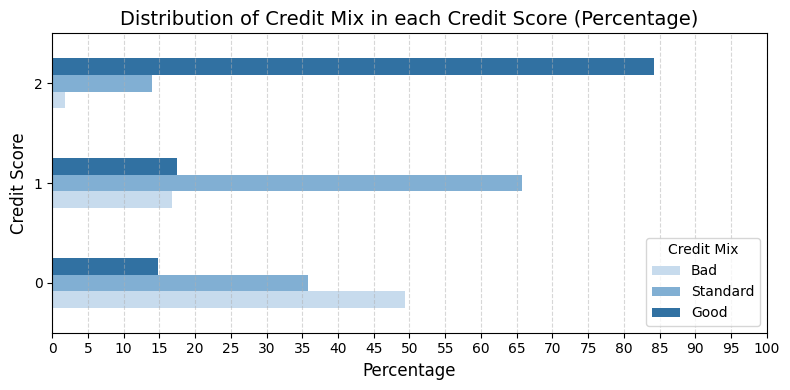

In [735]:
creditMixDistribution = data.groupby(['credit_score', 'credit_mix']).size().unstack(fill_value=0)

creditMixSums = creditMixDistribution.sum(axis=1)   # calculating sum of each row. getting total count of each credit score
creditMixDistributionNormalized = creditMixDistribution.div(creditMixSums, axis=0)   # dviding each entry by total count of respective credit score
creditMixDistributionPercent = creditMixDistributionNormalized * 100

creditMixDistributionPercent = creditMixDistributionPercent[['Bad', 'Standard', 'Good']]    # for ordering

creditMixDistributionPercent.plot(kind='barh', figsize=(8, 4), color=['#c7dbed', '#81afd3', '#3171a2'])
plt.title('Distribution of Credit Mix in each Credit Score (Percentage)', fontsize=14)
plt.ylabel('Credit Score', fontsize=12)
plt.xlabel('Percentage', fontsize=12)
plt.legend(title='Credit Mix', fontsize=10)
plt.xticks(range(0, 101, 5), rotation=0)
plt.grid(True, axis='x', linestyle='--', alpha=0.5) 
plt.tight_layout()
plt.show()

The figure shows that around 50% of the customers who have a 0 (poor) credit score have a bad credit mix. More than 60% of the customers who have a standard credit mix have a 1 (standard) credit score. Lastly more than 80% of the customers who have a 2 (good) score have a good credit mix as well.

Checking distribution of payment_of_min_amount across within each credit score

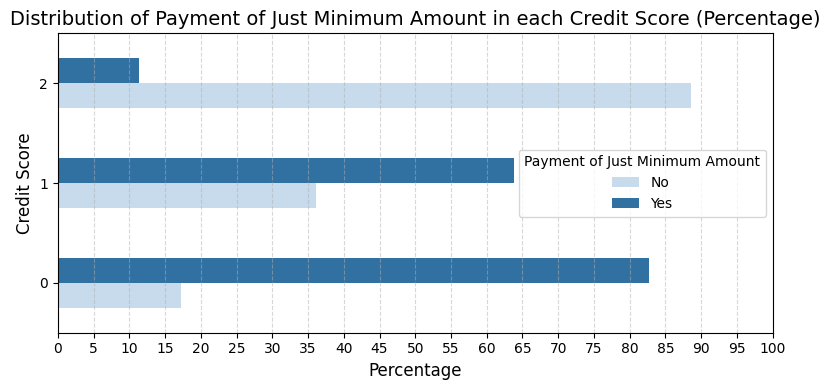

In [736]:
minAmtPaymentDistribution = data.groupby(['credit_score', 'payment_of_min_amount']).size().unstack(fill_value=0)

minAmtPaymentSums = minAmtPaymentDistribution.sum(axis=1) 
minAmtPaymentDistributionNormalized = minAmtPaymentDistribution.div(minAmtPaymentSums, axis=0) 
minAmtPaymentDistributionPercent = minAmtPaymentDistributionNormalized * 100

minAmtPaymentDistributionPercent = minAmtPaymentDistribution.div(minAmtPaymentDistribution.sum(axis=1), axis=0) * 100

minAmtPaymentDistributionPercent.plot(kind='barh', figsize=(8, 4), color=['#c7dbed', '#3171a2'])
plt.title('Distribution of Payment of Just Minimum Amount in each Credit Score (Percentage)', fontsize=14)
plt.ylabel('Credit Score', fontsize=12)
plt.xlabel('Percentage', fontsize=12)
plt.legend(title='Payment of Just Minimum Amount', fontsize=10)
plt.xticks(range(0, 101, 5), rotation=0)
plt.grid(True, axis='x', linestyle='--', alpha=0.5) 
plt.tight_layout()
plt.show()

According to the figure, more then 80% of the customers with a 0 (poor) credit score and more than 60% of the customers with a 1 (standard) credit score paid just the minimum amount. Whereas more than 85% of the customers with a 2 (good) credit score did not pay just the minimum amount (meaning they paid more than that).

Creating a correlation matrx

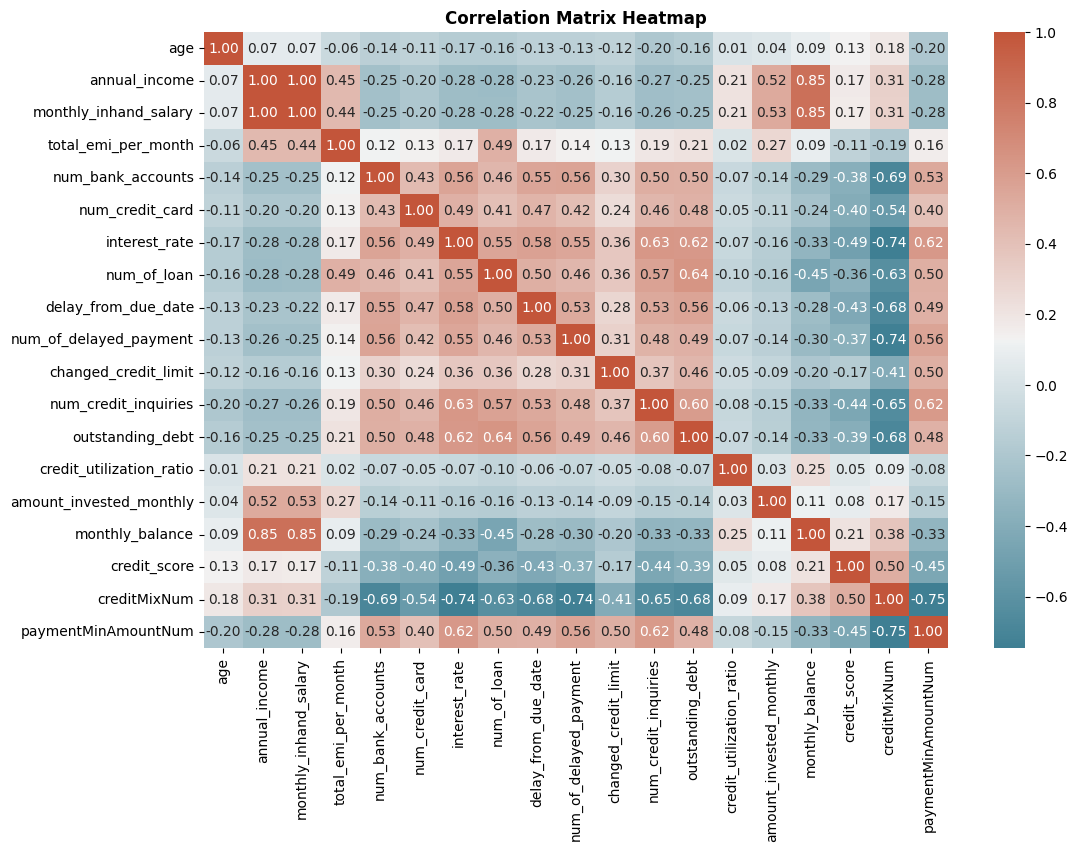

In [737]:
numericColumns = []

for col in data.select_dtypes(include='number').columns:
    if col not in loanTypes:
        numericColumns.append(col)

# dataLogTransformed = data[numericColumns].apply(lambda x: np.log(x + 1))

correlationMatrix = data[numericColumns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlationMatrix, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), fmt='.2f', cbar=True, 
            xticklabels=correlationMatrix.columns, yticklabels=correlationMatrix.columns)

plt.title('Correlation Matrix Heatmap', fontsize=12, fontweight="bold")
plt.show()

In [738]:
correlationWithCreditScore = correlationMatrix['credit_score'].sort_values(key=lambda x: x.abs(), ascending=False)

correlationTable = correlationWithCreditScore.reset_index()
correlationTable.columns = ['Column', 'Correlation with Credit Score']
correlationTableDF = pd.DataFrame(correlationTable)
correlationTableDF

Column  Correlation with Credit Score
0               credit_score                          1.000
1               creditMixNum                          0.503
2              interest_rate                         -0.490
3        paymentMinAmountNum                         -0.445
4       num_credit_inquiries                         -0.445
5        delay_from_due_date                         -0.426
6            num_credit_card                         -0.403
7           outstanding_debt                         -0.385
8          num_bank_accounts                         -0.384
9     num_of_delayed_payment                         -0.366
10               num_of_loan                         -0.361
11           monthly_balance                          0.211
12             annual_income                          0.168
13     monthly_inhand_salary                          0.167
14      changed_credit_limit                         -0.165
15                       age                          0.127
16       total_emi_per_month                         -0.113
17   amount_invested_monthly                          0.081
18  credit_utilization_ratio                          0.047

Anova test to check which numerical variables have a significant relation with credit score. Followed by eta squared to check effect size.

1. 0.01 - Small effect size
2. 0.06 - Medium effect size
3. 0.14 or higher - Large effect size [1]

    1. https://www.statology.org/eta-squared/

In [739]:
# https://stackoverflow.com/questions/52083501/how-to-compute-correlation-ratio-or-eta-in-python

def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    
    ssw = 0
    ssb = 0
    for category in set(categories):
        subgroup = values[np.where(categories == category)[0]]
        ssw += sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(values))**2

    return (ssb / (ssb + ssw))

results = {}

for column in numericColumns:
    if column != 'credit_score':
        groupData = []
        for score in data['credit_score'].unique():
            groupData.append(data[data['credit_score'] == score][column].tolist())
            
        f_stat, p_value = f_oneway(groupData[0], groupData[1], groupData[2])
        results[column] = {'F-statistic': f_stat, 'p-value': p_value}

        if (p_value <= 0.05):
            etaSquared = correlation_ratio(data['credit_score'], data[column])
            results[column]['etaSquared'] = etaSquared


resultsDF = pd.DataFrame(results).T
resultsDF.sort_values('etaSquared', ascending=False, inplace=True)

resultsDF

F-statistic  p-value  etaSquared
creditMixNum                14553.874    0.000       0.278
interest_rate               11940.755    0.000       0.240
paymentMinAmountNum         11041.741    0.000       0.226
num_credit_inquiries         9547.115    0.000       0.202
delay_from_due_date          8403.175    0.000       0.182
num_credit_card              7312.740    0.000       0.162
outstanding_debt             6878.150    0.000       0.154
num_bank_accounts            6709.186    0.000       0.151
num_of_delayed_payment       6427.954    0.000       0.145
num_of_loan                  5778.282    0.000       0.133
changed_credit_limit         1917.378    0.000       0.048
monthly_balance              1755.574    0.000       0.044
annual_income                1099.084    0.000       0.028
monthly_inhand_salary        1083.676    0.000       0.028
age                           627.651    0.000       0.016
total_emi_per_month           518.059    0.000       0.014
amount_invested_monthly       251.754    0.000       0.007
credit_utilization_ratio       82.542    0.000       0.002

Chi Square test to check which categorical variables are associated or independent to the credit score. Followed by Cramer's V to check the level of association.

Using Cramers V to find the level of asociation between categorical columns and credit score. 
1. 0.00 to 0.20: The result is weak. Although the result is statistically significant, the fields are only weakly associated.
2. 0.20 to 0.60: The result is moderate. The fields are moderately associated.
3. 0.60 to 1.00: The result is strong. The fields are strongly associated. [2]

    2. https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=terms-cramrs-v

In [740]:
# function for corrected cramers v taken from https://stackoverflow.com/questions/20892799/using-pandas-calculate-cramérs-coefficient-matrix

def cramersCorrectedStat(confusionMatrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(confusionMatrix)[0]
    n = confusionMatrix.sum().sum()
    phi2 = chi2/n
    r,k = confusionMatrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

results = {}

for col in categoricalColumns:
    contingencyTable = pd.crosstab(data['credit_score'], data[col])
    chi2, p, _, _ = chi2_contingency(contingencyTable)
    results[col] = {'chi2': chi2, 'p-value': p}

    if (p <= 0.05):
        results[col]["cramer's v"] = cramersCorrectedStat(contingencyTable)


contingencyTable = pd.crosstab(loanData['credit_score'], loanData['loan_type'], values=loanData['loan_count'], aggfunc='sum')
chi2, p, _, _ = chi2_contingency(contingencyTable)
results['type_of_loan'] = {'chi2': chi2, 'p-value': p}

if (p <= 0.05):
    results['type_of_loan']["cramer's v"] = cramersCorrectedStat(contingencyTable)    

resultsDF = pd.DataFrame(results).T
resultsDF.sort_values("cramer's v", ascending=False, inplace=True)
resultsDF


chi2  p-value  cramer's v
payment_of_min_amount 17090.737    0.000       0.475
credit_mix            32538.092    0.000       0.464
payment_behaviour      1553.138    0.000       0.101
type_of_loan           4414.545    0.000       0.092
occupation              160.750    0.000       0.030
month                   125.971    0.000       0.027

Out of all the categorical columns, payment_of_min_amount and credit_mix have a moderate association with credit score.

After examing the data and looking at how FICO uses features to rank credit scores [3], I will examine the relationship of two categories with credit score. They are debt management and payment behaviour. According to this paper [4], demographic factors also have a high correlation with credit score hence I will also examine how a customer's demographic influences their credit score as well which is a non-financial feature.

3. https://www.clevelandfed.org/publications/economic-commentary/2010/ec-201016-your-credit-score-is-a-ranking-not-a-score
4. https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2042711

Aggregating relevant features and credit scores for customer segmentation

In [741]:
customerData = data.groupby('customer_id').agg({
    'outstanding_debt': 'mean',
    'num_of_loan': 'mean',
    'num_credit_card': 'mean',
    'delay_from_due_date': 'mean',
    'num_of_delayed_payment': 'mean',
    'paymentMinAmountNum': 'mean',
    'age': 'mean',
    'annual_income': 'mean',
    'credit_score': 'mean'
}).reset_index()

# Feature Columns
customerData['num_of_loan'] = customerData['num_of_loan'].round().astype(int)
customerData['num_credit_card'] = customerData['num_credit_card'].round().astype(int)
customerData['delay_from_due_date'] = customerData['delay_from_due_date'].round().astype(int)
customerData['num_of_delayed_payment'] = customerData['num_of_delayed_payment'].round().astype(int)
customerData['paymentMinAmountNum'] = customerData['paymentMinAmountNum'].round().astype(int)
customerData['age'] = customerData['age'].round().astype(int)
customerData['annual_income'] = customerData['annual_income'].round().astype(int)

# Target Colunn
customerData['credit_score'] = customerData['credit_score'].round().astype(int)


customerData.head()

customer_id  outstanding_debt  num_of_loan  num_credit_card  \
0  CUS_0x1009           202.680            4                5   
1  CUS_0x100b          1030.200            0                4   
2  CUS_0x1011           473.140            3                3   
3  CUS_0x1013          1233.510            3                3   
4  CUS_0x1015           340.220            0                4   

   delay_from_due_date  num_of_delayed_payment  paymentMinAmountNum  age  \
0                    7                      18                    1   26   
1                   13                       7                    0   19   
2                   27                      14                    1   44   
3                   13                       9                    0   44   
4                    8                       9                    1   27   

   annual_income  credit_score  
0          52313             1  
1         113781             0  
2          58918             1  
3          98621             1  
4          46951             2

Checking the credit score class distribution after aggregating

In [742]:
scoreCounts = customerData['credit_score'].value_counts()
scorePercentages = customerData['credit_score'].value_counts(normalize=True) * 100
scoreSummary = pd.DataFrame({
    'Count': scoreCounts,
    'Percentage (%)': scorePercentages
})


print("Credit score counts and percentages:\n", scoreSummary.sort_index())

Credit score counts and percentages:
    Count  Percentage (%)
0   3512          32.761
1   5231          48.797
2   1977          18.442


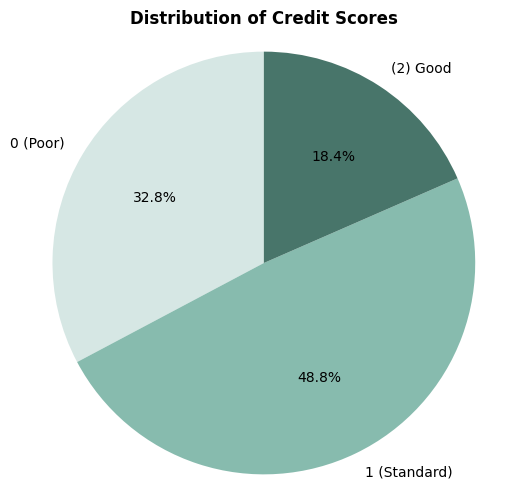

In [743]:
plt.figure(figsize=(6, 6))
plt.pie(scoreCounts.sort_index(), labels=['0 (Poor)', '1 (Standard)', '(2) Good'], autopct='%1.1f%%', startangle=90, colors=['#d6e7e4', '#87bbae', '#48756a'])
plt.title("Distribution of Credit Scores", fontsize=12, fontweight="bold")
plt.axis('equal')
plt.show()

How do specific debt management features impact the likelihood of an individual achieving a good credit score?

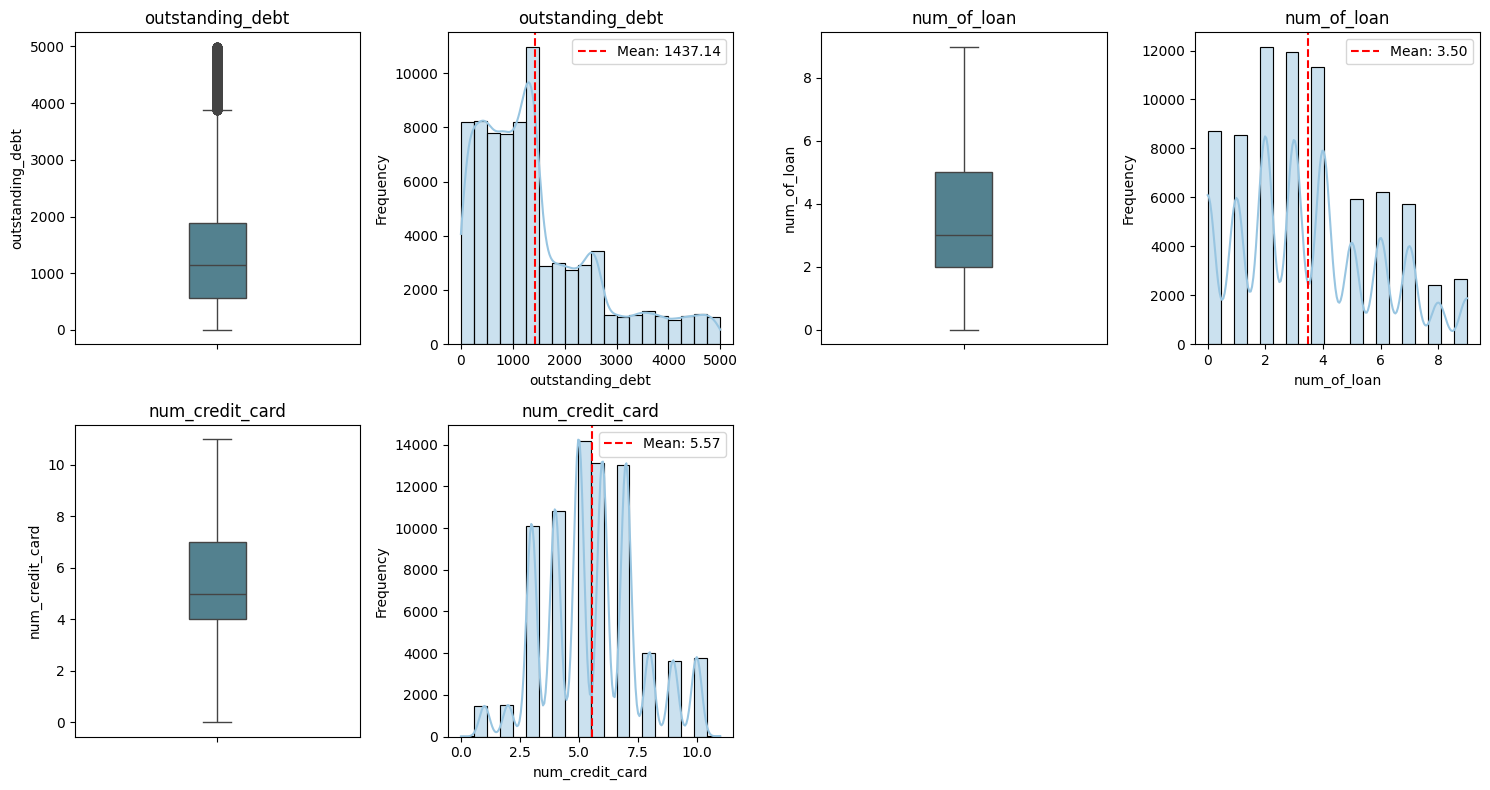

In [744]:
debtManagementColumns = ['outstanding_debt', 'num_of_loan', 'num_credit_card']

numPlots = len(debtManagementColumns)
rows = (numPlots // 2) + 1
cols = 4  

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(debtManagementColumns):
    sns.boxplot(data=customerData, y=col, ax=axes[2 * i], color="#498699",  width=0.2)
    axes[2 * i].set_title(f'{col}', fontsize=12)
    axes[2 * i].set_ylabel(col, fontsize=10)

    sns.histplot(data=data, x=col, ax=axes[2 * i + 1], color="#98c5e1", kde=True, bins=20)
    mean_value = data[col].mean()
    axes[2 * i + 1].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[2 * i + 1].legend()

    axes[2 * i + 1].set_title(f'{col}', fontsize=12)
    axes[2 * i + 1].set_xlabel(col, fontsize=10)
    axes[2 * i + 1].set_ylabel('Frequency', fontsize=10)

for j in range(2 * numPlots, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.tight_layout()
plt.show()

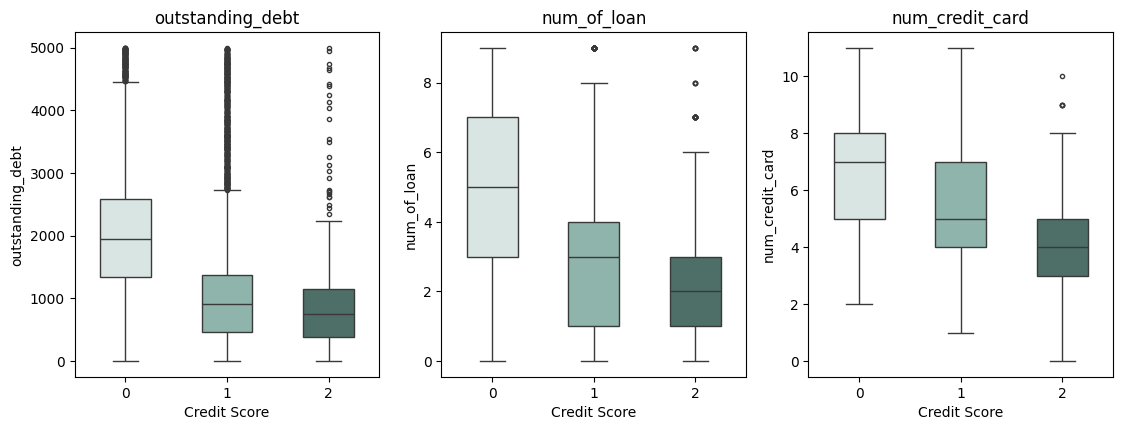

In [745]:
customPalette = {0: "#d6e7e4", 1: "#87bbae", 2: "#48756a"}
flierprops = dict(markersize=3)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(debtManagementColumns):
    sns.boxplot(data=customerData, x='credit_score', y=col, ax=axes[i], hue='credit_score', palette=customPalette, width=0.5, legend=False, flierprops=flierprops)
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('Credit Score')
    axes[i].set_ylabel(col)

for j in range(numPlots, len(axes)):
    axes[j].set_visible(False)

plt.subplots_adjust(hspace=0.4, wspace=5)
plt.tight_layout()
plt.show()

Anova test to check if there is significance difference between the debt management attributes of customers belonging to different credit scores. Followed by eta squared to check effect size.

In [746]:
def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    
    ssw = 0
    ssb = 0
    for category in set(categories):
        subgroup = values[np.where(categories == category)[0]]
        ssw += sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(values))**2

    return (ssb / (ssb + ssw))

results = {}

for column in debtManagementColumns:
    groupData = []
    for score in customerData['credit_score'].unique():
        groupData.append(customerData[customerData['credit_score'] == score][column].tolist())
        
    f_stat, p_value = f_oneway(groupData[0], groupData[1], groupData[2])
    results[column] = {'F-statistic': f_stat, 'p-value': p_value}

    if (p_value <= 0.05):
        etaSquared = correlation_ratio(customerData['credit_score'], customerData[column])
        results[column]['etaSquared'] = etaSquared


resultsDF = pd.DataFrame(results).T
resultsDF.sort_values('etaSquared', ascending=False, inplace=True)

resultsDF

F-statistic  p-value  etaSquared
num_credit_card      1294.554    0.000       0.195
outstanding_debt     1228.893    0.000       0.187
num_of_loan          1006.234    0.000       0.158

Customer Segmentation based on Debt Management using K Mean Clustering

Using Silhoutte Score to find ideal number of clusters. https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

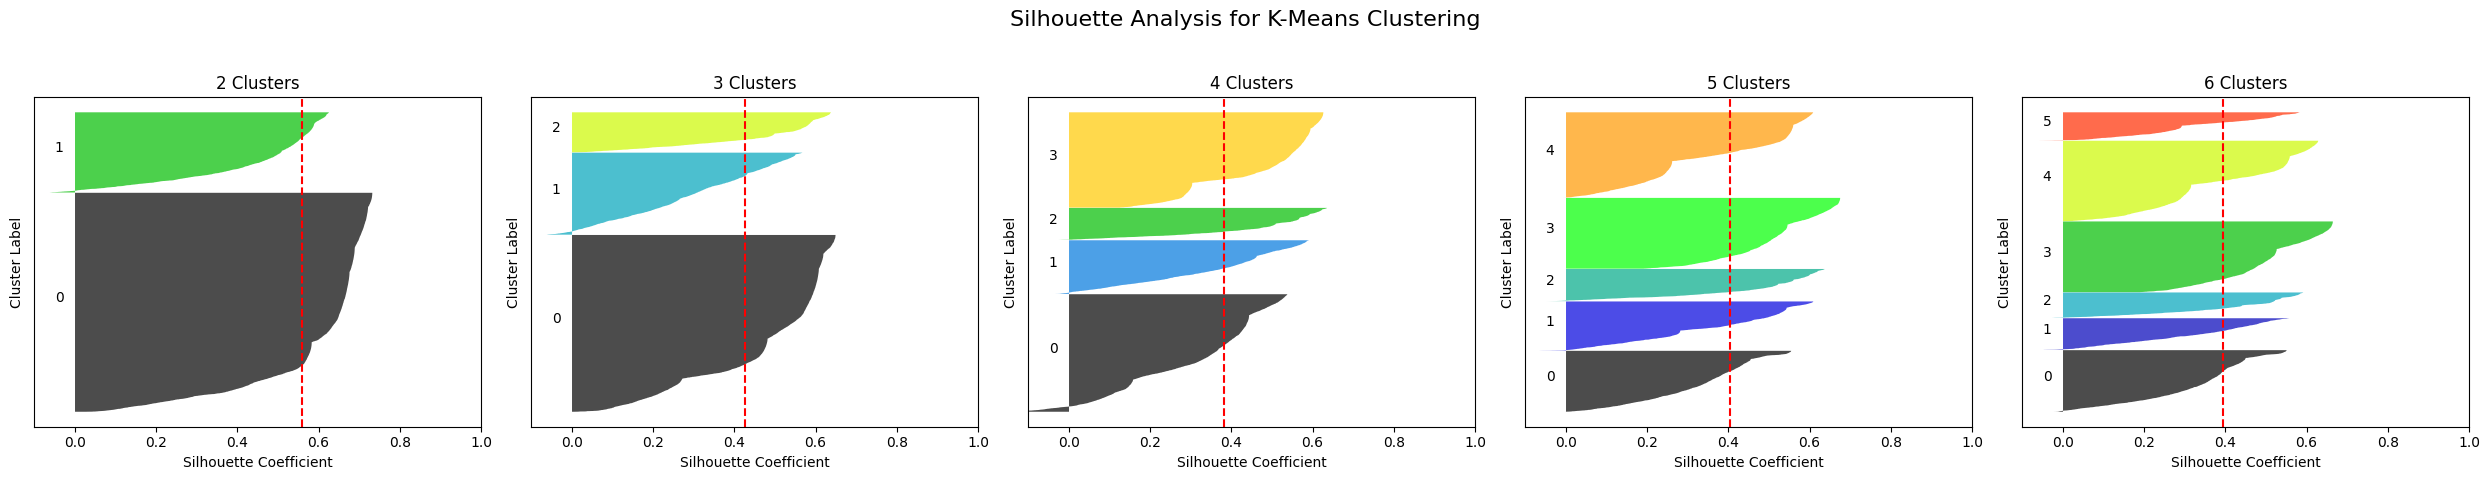

In [747]:
# https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
features = ['outstanding_debt', 'num_of_loan']
scaler = StandardScaler()
debtManagementScaled = scaler.fit_transform(customerData[features])

clusterRange = range(2, 7)  
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle("Silhouette Analysis for K-Means Clustering", fontsize=16)

for i, nClusters in enumerate(clusterRange):
    ax = axes[i]
    kmeans = KMeans(n_clusters=nClusters, random_state=42, n_init='auto')
    clusterLabels = kmeans.fit_predict(debtManagementScaled)
    silhouetteAvg = silhouette_score(debtManagementScaled, clusterLabels)
    silhouetteValues = silhouette_samples(debtManagementScaled, clusterLabels)
    y_lower = 10
    for i in range(nClusters):
        ithClusterSilhouetteValues = silhouetteValues[clusterLabels == i]
        ithClusterSilhouetteValues.sort()
        size_cluster_i = ithClusterSilhouetteValues.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / nClusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ithClusterSilhouetteValues, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{nClusters} Clusters")
    ax.axvline(x=silhouetteAvg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_xlim([-0.1, 1])
    ax.set_ylabel("Cluster Label")
    ax.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

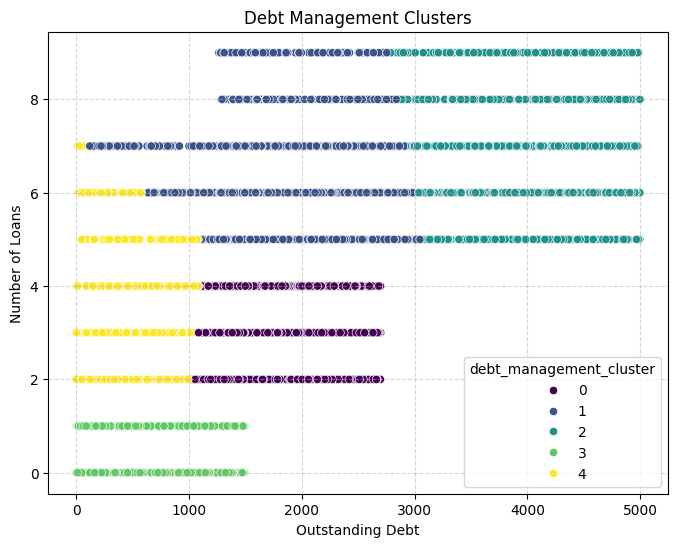

In [748]:
dataClusters = customerData.copy()
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
dataClusters['debt_management_cluster'] = kmeans.fit_predict(debtManagementScaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataClusters['outstanding_debt'], y=dataClusters['num_of_loan'], hue=dataClusters['debt_management_cluster'], palette='viridis')
plt.title('Debt Management Clusters')
plt.xlabel('Outstanding Debt')
plt.ylabel('Number of Loans')
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()

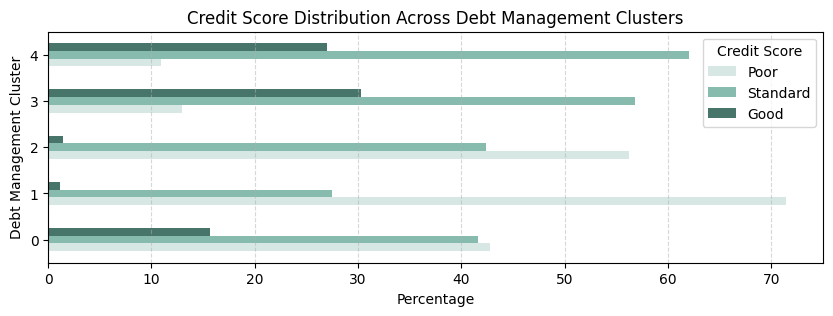

In [749]:
clusterScoreDistribution = pd.crosstab(dataClusters['credit_score'], dataClusters['debt_management_cluster'], normalize='columns') * 100

clusterScoreDistribution.T.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distribution Across Debt Management Clusters')
plt.xlabel('Percentage')
plt.ylabel('Debt Management Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(True, axis='x', linestyle='--', alpha=0.5) 
plt.show()

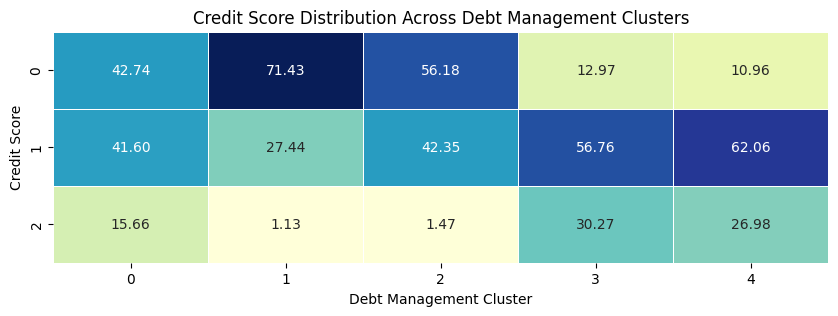

In [750]:
clusterScoreDistribution = clusterScoreDistribution.round(2)

plt.figure(figsize=(10, 3))
sns.heatmap(clusterScoreDistribution, annot=True, cmap='YlGnBu', cbar=False, fmt='.2f', linewidths=.5)

plt.title('Credit Score Distribution Across Debt Management Clusters')
plt.xlabel('Debt Management Cluster')
plt.ylabel('Credit Score')
plt.show()

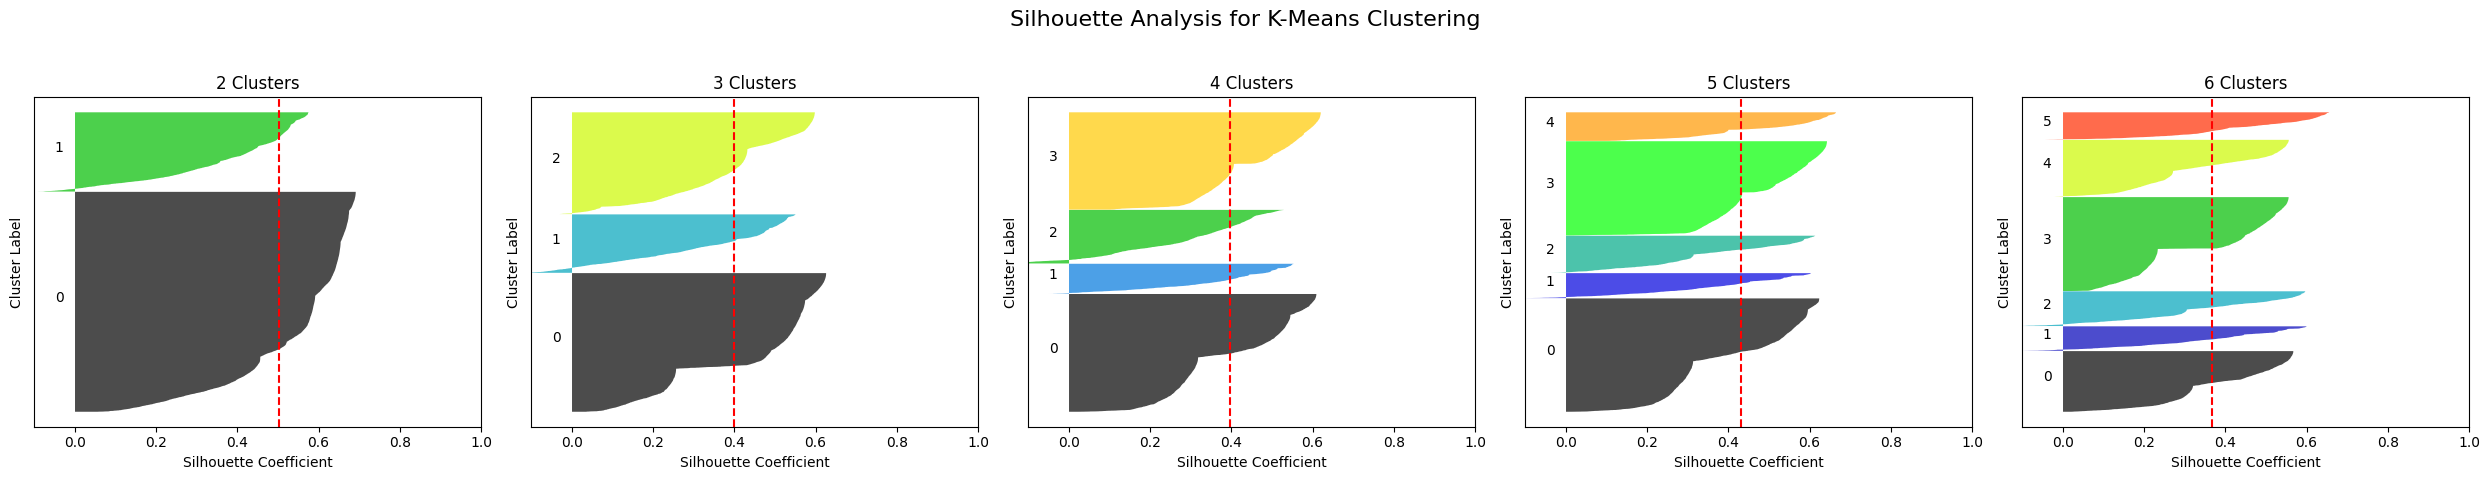

In [751]:
features = ['outstanding_debt', 'num_credit_card']
scaler = StandardScaler()
debtManagementScaled = scaler.fit_transform(customerData[features])

clusterRange = range(2, 7)  
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle("Silhouette Analysis for K-Means Clustering", fontsize=16)

for i, nClusters in enumerate(clusterRange):
    ax = axes[i]
    kmeans = KMeans(n_clusters=nClusters, random_state=42, n_init='auto')
    clusterLabels = kmeans.fit_predict(debtManagementScaled)
    silhouetteAvg = silhouette_score(debtManagementScaled, clusterLabels)
    silhouetteValues = silhouette_samples(debtManagementScaled, clusterLabels)
    y_lower = 10
    for i in range(nClusters):
        ithClusterSilhouetteValues = silhouetteValues[clusterLabels == i]
        ithClusterSilhouetteValues.sort()
        size_cluster_i = ithClusterSilhouetteValues.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / nClusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ithClusterSilhouetteValues, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{nClusters} Clusters")
    ax.axvline(x=silhouetteAvg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_xlim([-0.1, 1])
    ax.set_ylabel("Cluster Label")
    ax.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

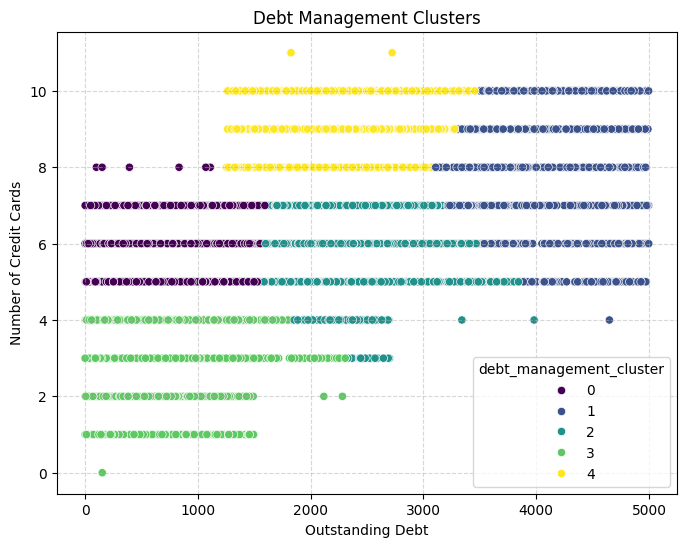

In [752]:
# dataClusters = customerData.copy()
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
dataClusters['debt_management_cluster'] = kmeans.fit_predict(debtManagementScaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataClusters['outstanding_debt'], y=dataClusters['num_credit_card'], hue=dataClusters['debt_management_cluster'], palette='viridis')
plt.title('Debt Management Clusters')
plt.xlabel('Outstanding Debt')
plt.ylabel('Number of Credit Cards')
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()

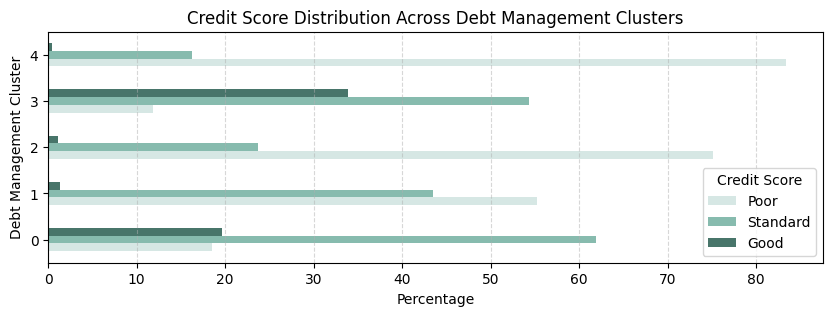

In [753]:
clusterScoreDistribution = pd.crosstab(dataClusters['credit_score'], dataClusters['debt_management_cluster'], normalize='columns') * 100

clusterScoreDistribution.T.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distribution Across Debt Management Clusters')
plt.xlabel('Percentage')
plt.ylabel('Debt Management Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(True, axis='x', linestyle='--', alpha=0.5) 
plt.show()

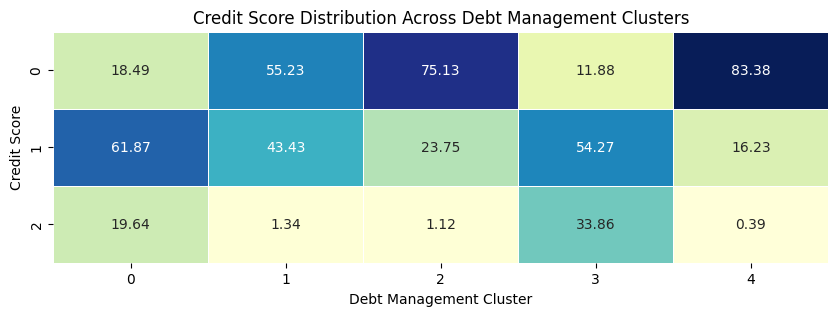

In [754]:
clusterScoreDistribution = clusterScoreDistribution.round(2)

plt.figure(figsize=(10, 3))
sns.heatmap(clusterScoreDistribution, annot=True, cmap='YlGnBu', cbar=False, fmt='.2f', linewidths=.5)

plt.title('Credit Score Distribution Across Debt Management Clusters')
plt.xlabel('Debt Management Cluster')
plt.ylabel('Credit Score')
plt.show()

Cluster with 3 variables

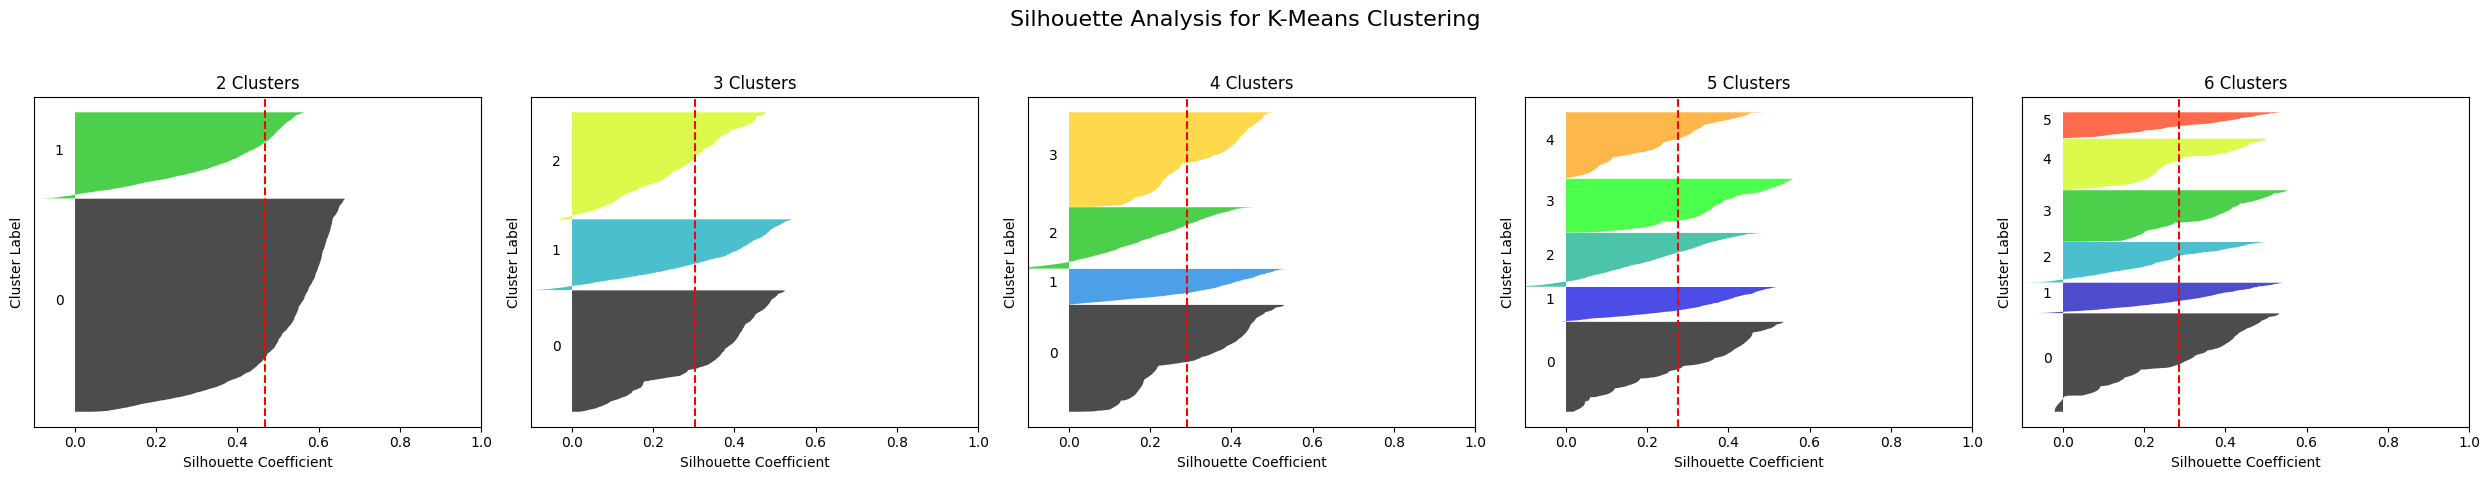

In [755]:
features = ['outstanding_debt', 'num_of_loan', 'num_credit_card']
scaler = StandardScaler()
debtManagementScaled = scaler.fit_transform(customerData[features])

clusterRange = range(2, 7)  
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle("Silhouette Analysis for K-Means Clustering", fontsize=16)

for i, nClusters in enumerate(clusterRange):
    ax = axes[i]
    kmeans = KMeans(n_clusters=nClusters, random_state=42, n_init='auto')
    clusterLabels = kmeans.fit_predict(debtManagementScaled)
    silhouetteAvg = silhouette_score(debtManagementScaled, clusterLabels)
    silhouetteValues = silhouette_samples(debtManagementScaled, clusterLabels)
    y_lower = 10
    for i in range(nClusters):
        ithClusterSilhouetteValues = silhouetteValues[clusterLabels == i]
        ithClusterSilhouetteValues.sort()
        size_cluster_i = ithClusterSilhouetteValues.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / nClusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ithClusterSilhouetteValues, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{nClusters} Clusters")
    ax.axvline(x=silhouetteAvg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_xlim([-0.1, 1])
    ax.set_ylabel("Cluster Label")
    ax.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

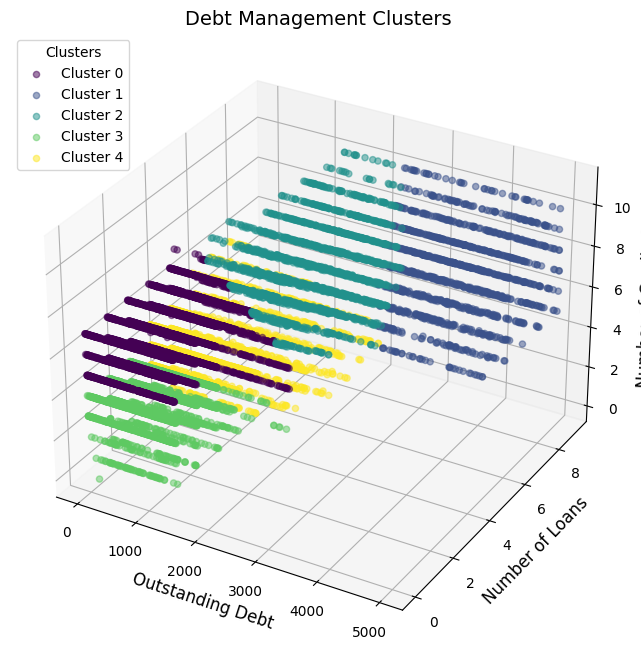

In [756]:
# https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/
# https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html

kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
# dataClusters = customerData.copy()
dataClusters['debt_management_cluster'] = kmeans.fit_predict(debtManagementScaled)

colours = cm.viridis(np.linspace(0, 1, 5))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

for cluster in range(5):
    clusterData = dataClusters[dataClusters['debt_management_cluster'] == cluster]
    ax.scatter(
        clusterData['outstanding_debt'], 
        clusterData['num_of_loan'], 
        clusterData['num_credit_card'], 
        color=colours[cluster], 
        label=f'Cluster {cluster}', 
        s=20, 
        alpha=0.5
    )

ax.set_title('Debt Management Clusters', fontsize=14)
ax.set_xlabel('Outstanding Debt', fontsize=12)
ax.set_ylabel('Number of Loans', fontsize=12)
ax.set_zlabel('Number of Credit Cards', fontsize=12)
ax.legend(title='Clusters', loc='upper left', fontsize=10)
plt.show()


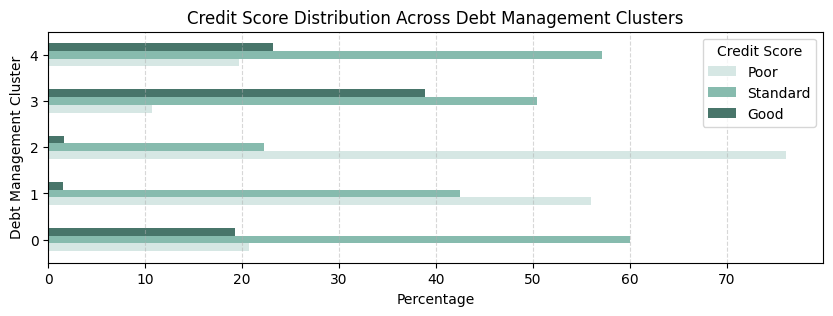

In [757]:
clusterScoreDistribution = pd.crosstab(dataClusters['credit_score'], dataClusters['debt_management_cluster'], normalize='columns') * 100

clusterScoreDistribution.T.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distribution Across Debt Management Clusters')
plt.xlabel('Percentage')
plt.ylabel('Debt Management Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

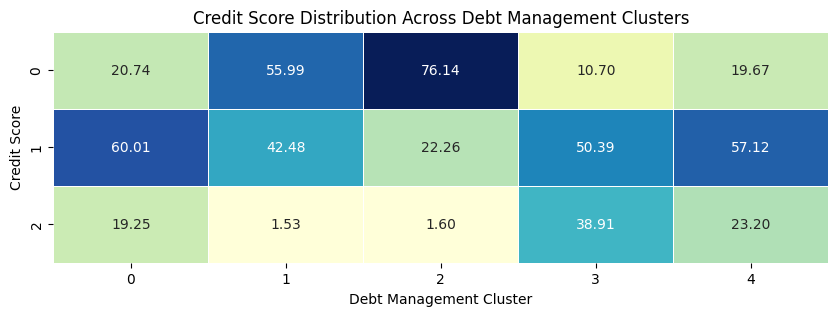

In [758]:
clusterScoreDistribution = clusterScoreDistribution.round(2)

plt.figure(figsize=(10, 3))
sns.heatmap(clusterScoreDistribution, annot=True, cmap='YlGnBu', cbar=False, fmt='.2f', linewidths=.5)

plt.title('Credit Score Distribution Across Debt Management Clusters')
plt.xlabel('Debt Management Cluster')
plt.ylabel('Credit Score')
plt.show()

Logistic Regression to predict credit score using debt management varialbes to quantify their impact. https://www.geeksforgeeks.org/ml-logistic-regression-using-python/

In [759]:
x = customerData[['outstanding_debt', 'num_credit_card', 'num_of_loan']]
y = customerData['credit_score']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [760]:
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

In [761]:
model = LogisticRegression(multi_class='multinomial')
result = model.fit(xTrain, yTrain)

In [762]:
yPred = model.predict(xTest)
accuracy = accuracy_score(yTest, yPred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 62.03%


In [763]:
classNames = [f"Credit Score {className}" for className in model.classes_]

coefficients_df = pd.DataFrame(
    model.coef_.T, 
    index=x.columns, 
    columns= classNames)

print(coefficients_df)

                  Credit Score 0  Credit Score 1  Credit Score 2
outstanding_debt           0.427           0.005          -0.432
num_credit_card            0.529           0.079          -0.608
num_of_loan                0.294           0.037          -0.331


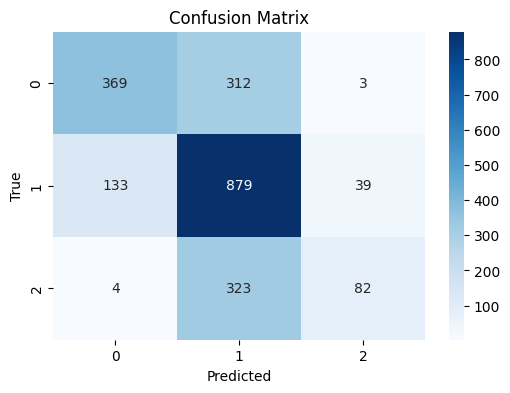

In [764]:
confusionMatrix = confusion_matrix(yTest, yPred)

plt.figure(figsize=(6, 4))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

What is the relationship between an individual’s payment behavior and their credit score?

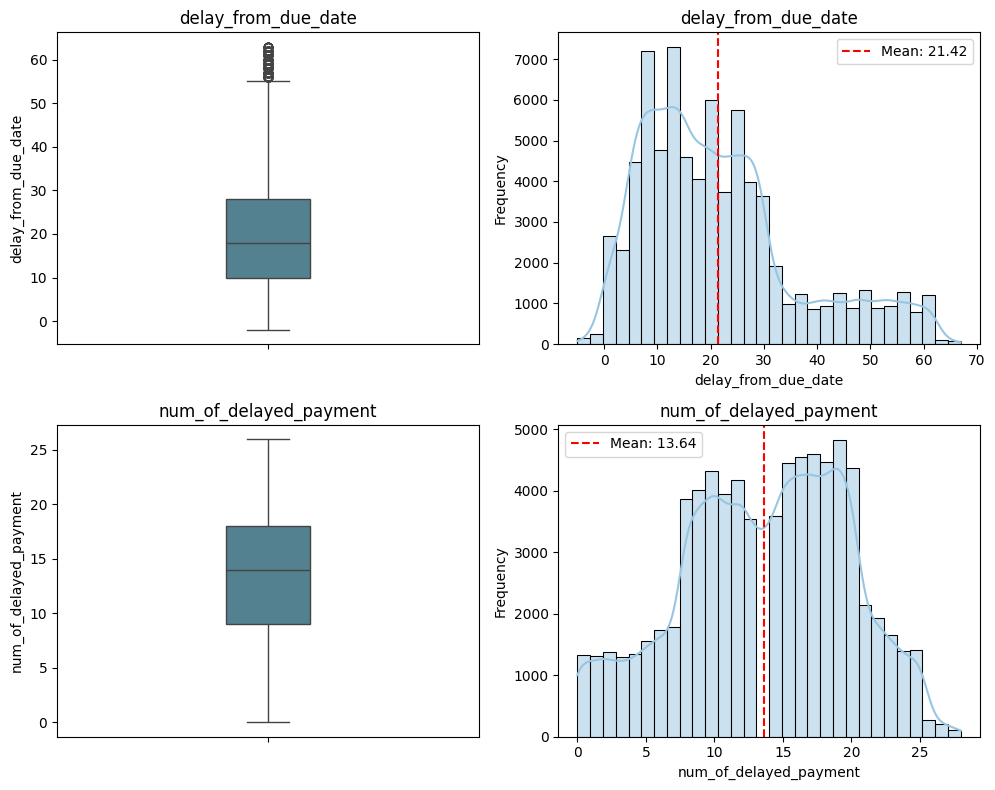

In [765]:
paymentBehaviourColumns = ['delay_from_due_date', 'num_of_delayed_payment']

numPlots = len(paymentBehaviourColumns)
rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 4))
axes = axes.flatten()

for i, col in enumerate(paymentBehaviourColumns):
    sns.boxplot(data=customerData, y=col, ax=axes[2 * i], color="#498699",  width=0.2)
    axes[2 * i].set_title(f'{col}', fontsize=12)
    axes[2 * i].set_ylabel(col, fontsize=10)

    sns.histplot(data=data, x=col, ax=axes[2 * i + 1], color="#98c5e1", kde=True, bins=30)
    mean_value = data[col].mean()
    axes[2 * i + 1].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[2 * i + 1].legend()

    axes[2 * i + 1].set_title(f'{col}', fontsize=12)
    axes[2 * i + 1].set_xlabel(col, fontsize=10)
    axes[2 * i + 1].set_ylabel('Frequency', fontsize=10)

for j in range(2 * numPlots, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Count')

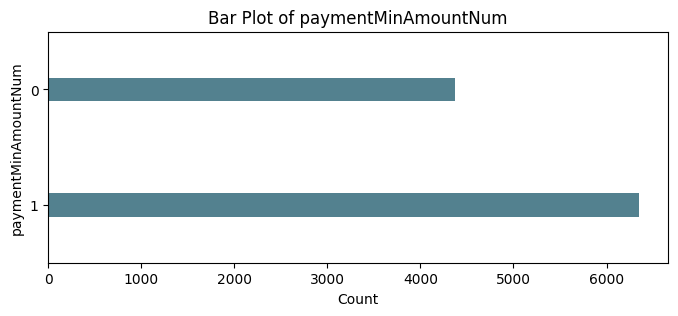

In [766]:
plt.figure(figsize=(8, 3))
sns.countplot(data=customerData, y='paymentMinAmountNum', color='#498699', width=0.2, legend=False, orient='h')
plt.title('Bar Plot of paymentMinAmountNum', fontsize=12)
plt.ylabel('paymentMinAmountNum', fontsize=10)
plt.xlabel('Count', fontsize=10)

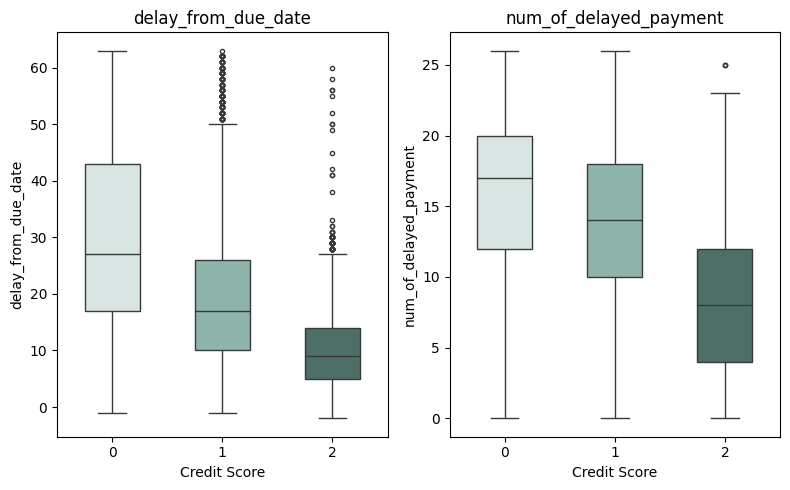

In [767]:
customPalette = {0: "#d6e7e4", 1: "#87bbae", 2: "#48756a"}
flierprops = dict(markersize=3)

fig, axes = plt.subplots(1, 2, figsize=(8, 5))
axes = axes.flatten()

for i, col in enumerate(paymentBehaviourColumns):
    sns.boxplot(data=customerData, x='credit_score', y=col, ax=axes[i], hue='credit_score', palette=customPalette, width=0.5, legend=False, flierprops=flierprops)
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('Credit Score')
    axes[i].set_ylabel(col)

for j in range(numPlots, len(axes)):
    axes[j].set_visible(False)

plt.subplots_adjust(hspace=0.4, wspace=8)
plt.tight_layout()
plt.show()

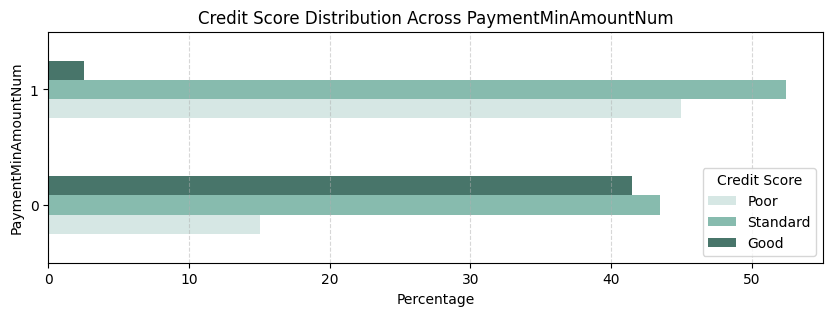

In [768]:
paymentMinAmountDistribution = pd.crosstab(customerData['paymentMinAmountNum'], customerData['credit_score'], normalize='index') * 100

paymentMinAmountDistribution.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distribution Across PaymentMinAmountNum')
plt.xlabel('Percentage')
plt.ylabel('PaymentMinAmountNum')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(True, axis='x', linestyle='--', alpha=0.5) 
plt.show()

Anova test to check if there is significance difference between the payment behaviour attributes of customers belonging to different credit scores. Followed by eta squared to check effect size.

In [769]:
results = {}

for column in paymentBehaviourColumns:
    groupData = []
    for score in customerData['credit_score'].unique():
        groupData.append(customerData[customerData['credit_score'] == score][column].tolist())
        
    f_stat, p_value = f_oneway(groupData[0], groupData[1], groupData[2])
    results[column] = {'F-statistic': f_stat, 'p-value': p_value}

    if (p_value <= 0.05):
        etaSquared = correlation_ratio(customerData['credit_score'], customerData[column])
        results[column]['etaSquared'] = etaSquared


resultsDF = pd.DataFrame(results).T
resultsDF.sort_values('etaSquared', ascending=False, inplace=True)

resultsDF

F-statistic  p-value  etaSquared
delay_from_due_date        1540.769    0.000       0.223
num_of_delayed_payment     1175.577    0.000       0.180

Chi Square test to check if paymentMinAmountNum is associated or independent to the credit score. Followed by Cramer's V to check the level of association.

In [770]:
results = {}
contingencyTable = pd.crosstab(customerData['credit_score'], customerData['paymentMinAmountNum'])
chi2, p, _, _ = chi2_contingency(contingencyTable)
results['paymentMinAmountNum'] = {'chi2': chi2, 'p-value': p}

if (p <= 0.05):
    results['paymentMinAmountNum']["cramer's v"] = cramersCorrectedStat(contingencyTable)

print(results)

{'paymentMinAmountNum': {'chi2': 2879.7318747499944, 'p-value': 0.0, "cramer's v": 0.5181410680112958}}


Customer Segmentation based on Payment Behaviour using K Mean Clustering

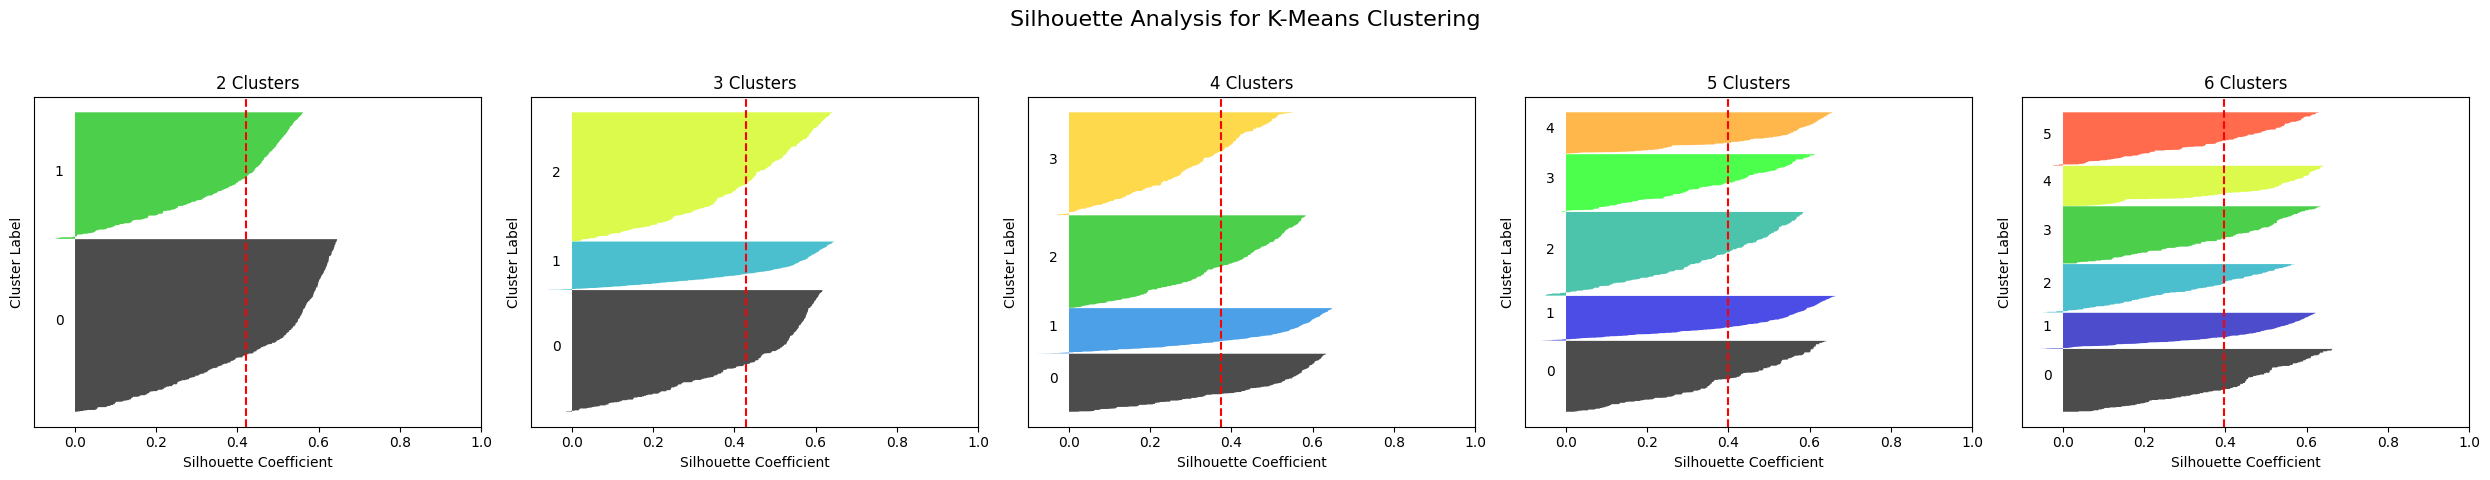

In [771]:
features = ['delay_from_due_date', 'num_of_delayed_payment']
scaler = StandardScaler()
paymentBehaviourScaled = scaler.fit_transform(customerData[features])

clusterRange = range(2, 7)  
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle("Silhouette Analysis for K-Means Clustering", fontsize=16)

for i, nClusters in enumerate(clusterRange):
    ax = axes[i]
    kmeans = KMeans(n_clusters=nClusters, random_state=42, n_init='auto')
    clusterLabels = kmeans.fit_predict(paymentBehaviourScaled)
    silhouetteAvg = silhouette_score(paymentBehaviourScaled, clusterLabels)
    silhouetteValues = silhouette_samples(paymentBehaviourScaled, clusterLabels)
    y_lower = 10
    for i in range(nClusters):
        ithClusterSilhouetteValues = silhouetteValues[clusterLabels == i]
        ithClusterSilhouetteValues.sort()
        size_cluster_i = ithClusterSilhouetteValues.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / nClusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ithClusterSilhouetteValues, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{nClusters} Clusters")
    ax.axvline(x=silhouetteAvg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_xlim([-0.1, 1])
    ax.set_ylabel("Cluster Label")
    ax.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

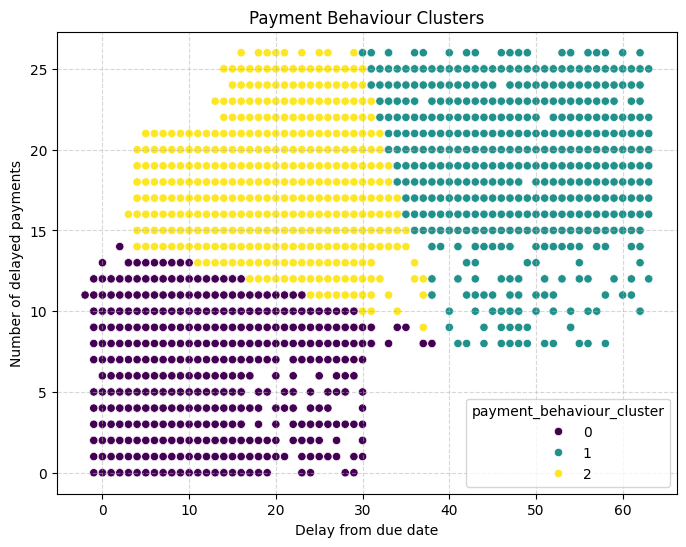

In [772]:
# dataClusters = customerData.copy()
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
dataClusters['payment_behaviour_cluster'] = kmeans.fit_predict(paymentBehaviourScaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataClusters['delay_from_due_date'], y=dataClusters['num_of_delayed_payment'], hue=dataClusters['payment_behaviour_cluster'], palette='viridis')
plt.title('Payment Behaviour Clusters')
plt.xlabel('Delay from due date')
plt.ylabel('Number of delayed payments')
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()

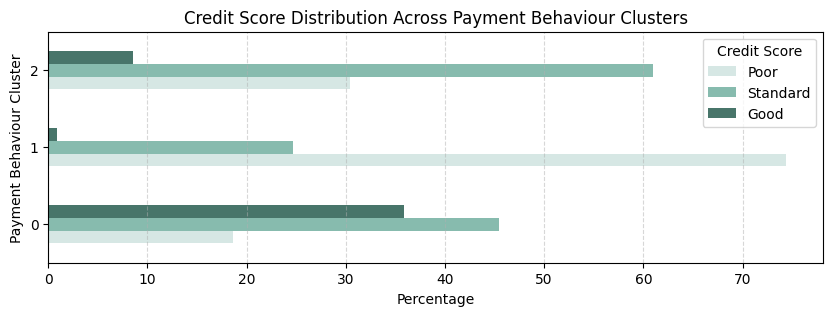

In [773]:
clusterScoreDistribution = pd.crosstab(dataClusters['credit_score'], dataClusters['payment_behaviour_cluster'], normalize='columns') * 100

clusterScoreDistribution.T.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distribution Across Payment Behaviour Clusters')
plt.xlabel('Percentage')
plt.ylabel('Payment Behaviour Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(True, axis='x', linestyle='--', alpha=0.5) 
plt.show()

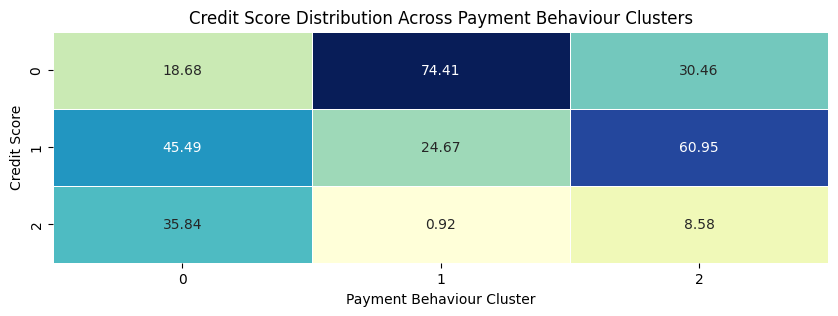

In [774]:
clusterScoreDistribution = clusterScoreDistribution.round(2)

plt.figure(figsize=(10, 3))
sns.heatmap(clusterScoreDistribution, annot=True, cmap='YlGnBu', cbar=False, fmt='.2f', linewidths=.5)

plt.title('Credit Score Distribution Across Payment Behaviour Clusters')
plt.xlabel('Payment Behaviour Cluster')
plt.ylabel('Credit Score')
plt.show()

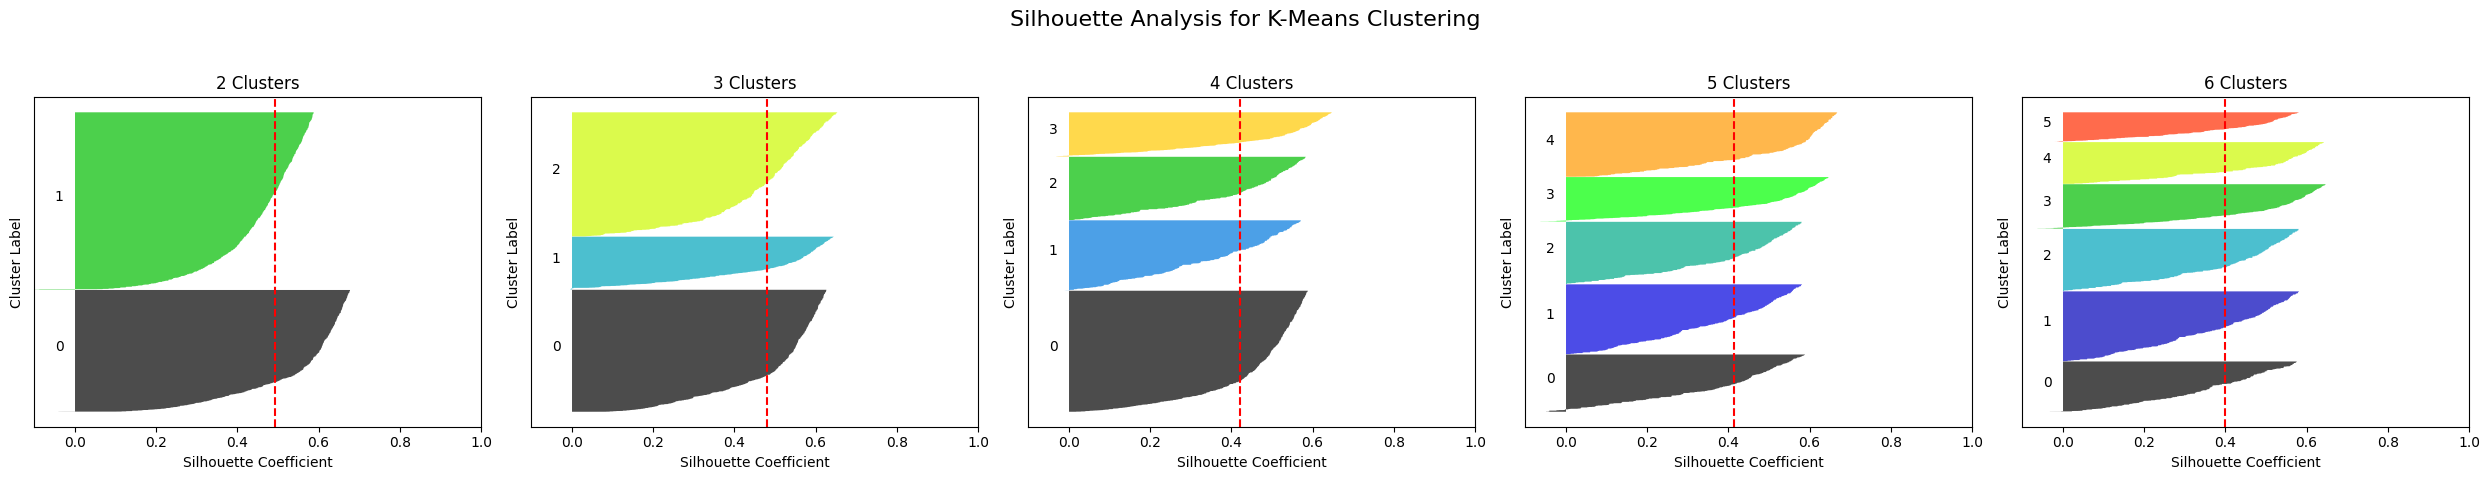

In [775]:
features = ['delay_from_due_date', 'num_of_delayed_payment', 'paymentMinAmountNum']
scaler = StandardScaler()
paymentBehaviourScaled = scaler.fit_transform(customerData[features])

clusterRange = range(2, 7)  
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle("Silhouette Analysis for K-Means Clustering", fontsize=16)

for i, nClusters in enumerate(clusterRange):
    ax = axes[i]
    kmeans = KMeans(n_clusters=nClusters, random_state=42, n_init='auto')
    clusterLabels = kmeans.fit_predict(paymentBehaviourScaled)
    silhouetteAvg = silhouette_score(paymentBehaviourScaled, clusterLabels)
    silhouetteValues = silhouette_samples(paymentBehaviourScaled, clusterLabels)
    y_lower = 10
    for i in range(nClusters):
        ithClusterSilhouetteValues = silhouetteValues[clusterLabels == i]
        ithClusterSilhouetteValues.sort()
        size_cluster_i = ithClusterSilhouetteValues.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / nClusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ithClusterSilhouetteValues, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{nClusters} Clusters")
    ax.axvline(x=silhouetteAvg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_xlim([-0.1, 1])
    ax.set_ylabel("Cluster Label")
    ax.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


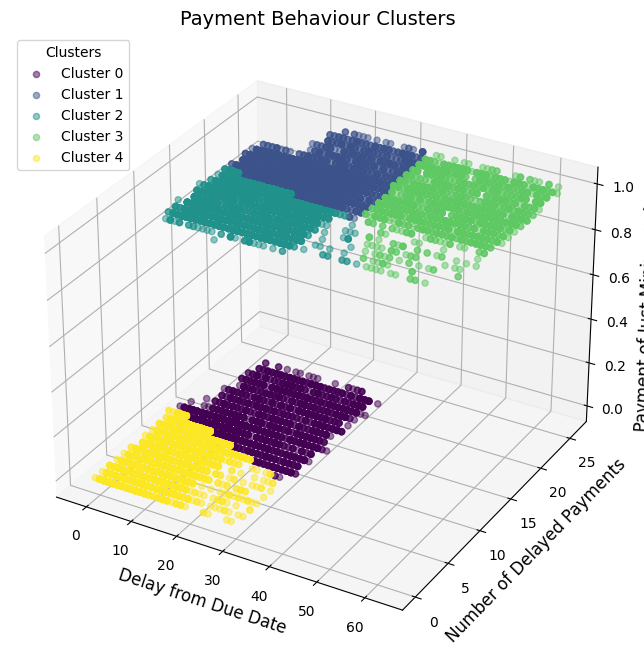

In [776]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
# dataClusters = customerData.copy()
dataClusters['payment_behaviour_cluster'] = kmeans.fit_predict(paymentBehaviourScaled)

colours = cm.viridis(np.linspace(0, 1, 5))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

for cluster in range(5):
    clusterData = dataClusters[dataClusters['payment_behaviour_cluster'] == cluster]
    ax.scatter(
        clusterData['delay_from_due_date'], 
        clusterData['num_of_delayed_payment'], 
        clusterData['paymentMinAmountNum'], 
        color=colours[cluster], 
        label=f'Cluster {cluster}', 
        s=20, 
        alpha=0.5
    )

ax.set_title('Payment Behaviour Clusters', fontsize=14)
ax.set_xlabel('Delay from Due Date', fontsize=12)
ax.set_ylabel('Number of Delayed Payments', fontsize=12)
ax.set_zlabel('Payment of Just Minimum Amount', fontsize=12)
ax.legend(title='Clusters', loc='upper left', fontsize=10)
plt.show()

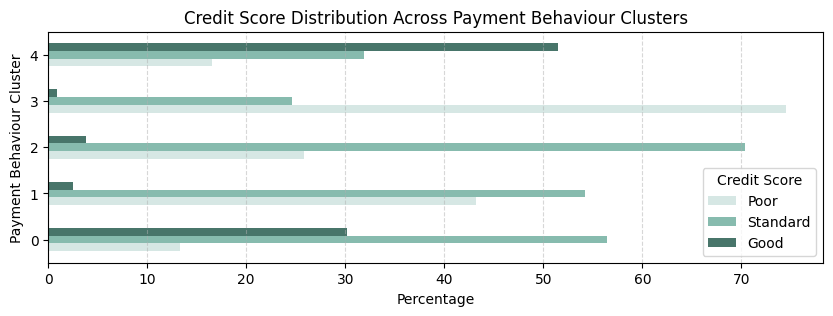

In [777]:
clusterScoreDistribution = pd.crosstab(dataClusters['credit_score'], dataClusters['payment_behaviour_cluster'], normalize='columns') * 100

clusterScoreDistribution.T.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distribution Across Payment Behaviour Clusters')
plt.xlabel('Percentage')
plt.ylabel('Payment Behaviour Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(True, axis='x', linestyle='--', alpha=0.5) 
plt.show()

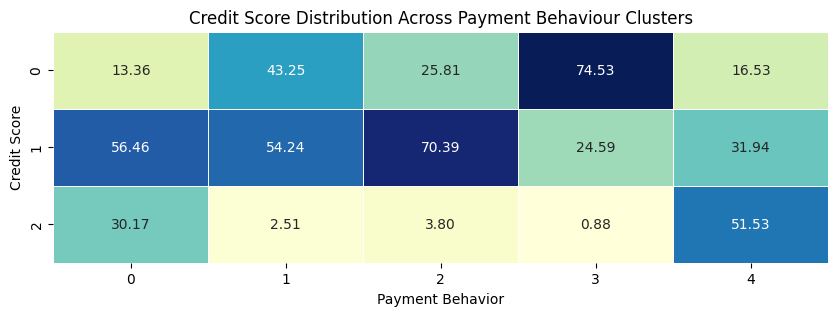

In [778]:
clusterScoreDistribution = clusterScoreDistribution.round(2)

plt.figure(figsize=(10, 3))
sns.heatmap(clusterScoreDistribution, annot=True, cmap='YlGnBu', cbar=False, fmt='.2f', linewidths=.5)

plt.title('Credit Score Distribution Across Payment Behaviour Clusters')
plt.xlabel('Payment Behavior')
plt.ylabel('Credit Score')
plt.show()

Logistic Regression to predict credit score using payment behaviour varialbes to quantify their impact.

In [779]:
x = customerData[['delay_from_due_date', 'num_of_delayed_payment', 'paymentMinAmountNum']]
y = customerData['credit_score']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [780]:
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

In [781]:
model = LogisticRegression(multi_class='multinomial')
result = model.fit(xTrain, yTrain)

In [782]:
yPred = model.predict(xTest)
accuracy = accuracy_score(yTest, yPred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 63.15%


In [783]:
classNames = [f"Credit Score {className}" for className in model.classes_]

coefficients_df = pd.DataFrame(
    model.coef_.T, 
    index=x.columns, 
    columns= classNames)

print(coefficients_df)

                        Credit Score 0  Credit Score 1  Credit Score 2
delay_from_due_date              0.689          -0.018          -0.671
num_of_delayed_payment           0.119           0.079          -0.199
paymentMinAmountNum              0.449           0.345          -0.794


To what extent do demographic factors such as age and income influence an individual’s credit score?

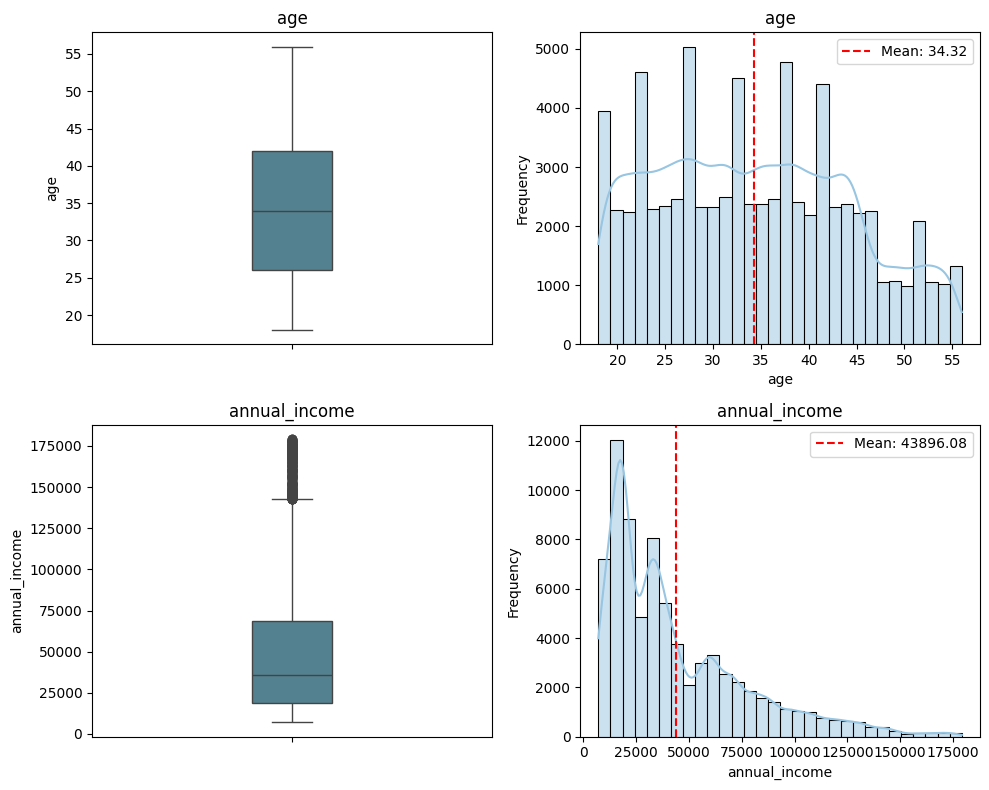

In [784]:
demographicFactorsColumns = ['age', 'annual_income']

numPlots = len(demographicFactorsColumns)
rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 4))
axes = axes.flatten()

for i, col in enumerate(demographicFactorsColumns):
    sns.boxplot(data=customerData, y=col, ax=axes[2 * i], color="#498699",  width=0.2)
    axes[2 * i].set_title(f'{col}', fontsize=12)
    axes[2 * i].set_ylabel(col, fontsize=10)

    sns.histplot(data=data, x=col, ax=axes[2 * i + 1], color="#98c5e1", kde=True, bins=30)
    mean_value = data[col].mean()
    axes[2 * i + 1].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[2 * i + 1].legend()

    axes[2 * i + 1].set_title(f'{col}', fontsize=12)
    axes[2 * i + 1].set_xlabel(col, fontsize=10)
    axes[2 * i + 1].set_ylabel('Frequency', fontsize=10)

for j in range(2 * numPlots, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.tight_layout()
plt.show()

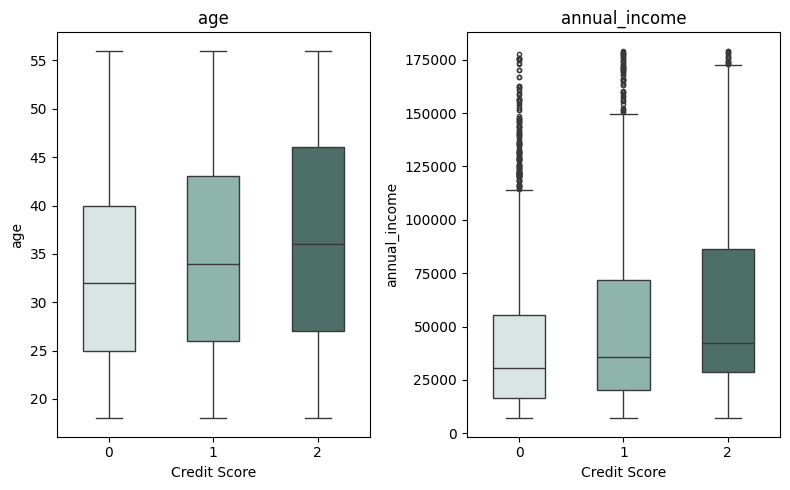

In [785]:
customPalette = {0: "#d6e7e4", 1: "#87bbae", 2: "#48756a"}
flierprops = dict(markersize=3)

fig, axes = plt.subplots(1, 2, figsize=(8, 5))
axes = axes.flatten()

for i, col in enumerate(demographicFactorsColumns):
    sns.boxplot(data=customerData, x='credit_score', y=col, ax=axes[i], hue='credit_score', palette=customPalette, width=0.5, legend=False, flierprops=flierprops)
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('Credit Score')
    axes[i].set_ylabel(col)

for j in range(numPlots, len(axes)):
    axes[j].set_visible(False)

plt.subplots_adjust(hspace=0.4, wspace=8)
plt.tight_layout()
plt.show()

Anova test to check if there is significance difference between the demographic factors attributes of customers belonging to different credit scores. Followed by eta squared to check effect size.

In [786]:
results = {}

for column in demographicFactorsColumns:
    groupData = []
    for score in customerData['credit_score'].unique():
        groupData.append(customerData[customerData['credit_score'] == score][column].tolist())
        
    f_stat, p_value = f_oneway(groupData[0], groupData[1], groupData[2])
    results[column] = {'F-statistic': f_stat, 'p-value': p_value}

    if (p_value <= 0.05):
        etaSquared = correlation_ratio(customerData['credit_score'], customerData[column])
        results[column]['etaSquared'] = etaSquared


resultsDF = pd.DataFrame(results).T
resultsDF.sort_values('etaSquared', ascending=False, inplace=True)

resultsDF

F-statistic  p-value  etaSquared
annual_income      220.063    0.000       0.039
age                 98.551    0.000       0.018

Customer Segmentation based on Demographic Factors using K Mean Clustering

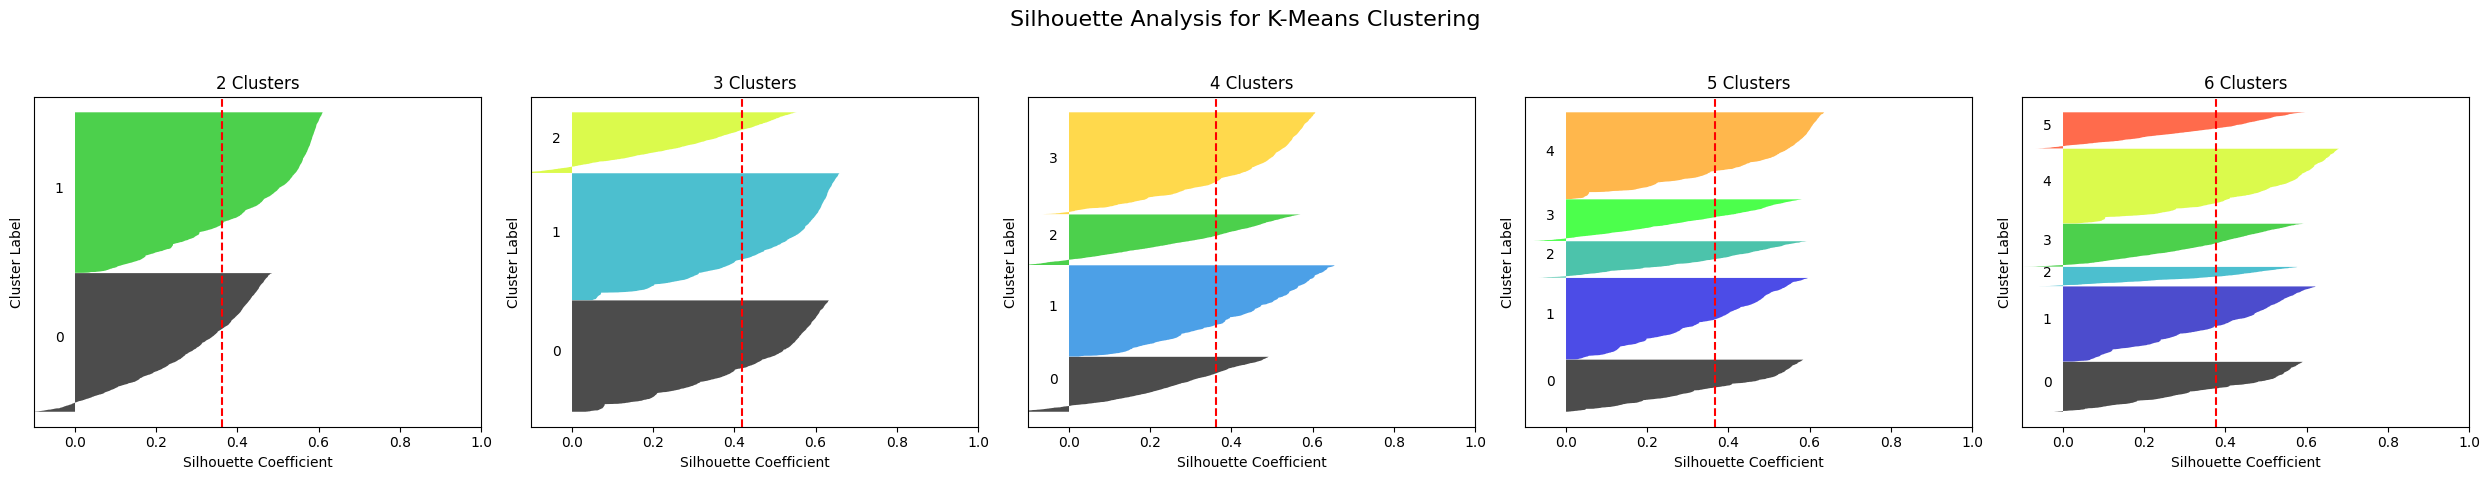

In [787]:
features = ['age', 'annual_income']
scaler = StandardScaler()
demographicFactorsScaled = scaler.fit_transform(customerData[features])

clusterRange = range(2, 7)  
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle("Silhouette Analysis for K-Means Clustering", fontsize=16)

for i, nClusters in enumerate(clusterRange):
    ax = axes[i]
    kmeans = KMeans(n_clusters=nClusters, random_state=42, n_init='auto')
    clusterLabels = kmeans.fit_predict(demographicFactorsScaled)
    silhouetteAvg = silhouette_score(demographicFactorsScaled, clusterLabels)
    silhouetteValues = silhouette_samples(demographicFactorsScaled, clusterLabels)
    y_lower = 10
    for i in range(nClusters):
        ithClusterSilhouetteValues = silhouetteValues[clusterLabels == i]
        ithClusterSilhouetteValues.sort()
        size_cluster_i = ithClusterSilhouetteValues.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / nClusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ithClusterSilhouetteValues, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{nClusters} Clusters")
    ax.axvline(x=silhouetteAvg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_xlim([-0.1, 1])
    ax.set_ylabel("Cluster Label")
    ax.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

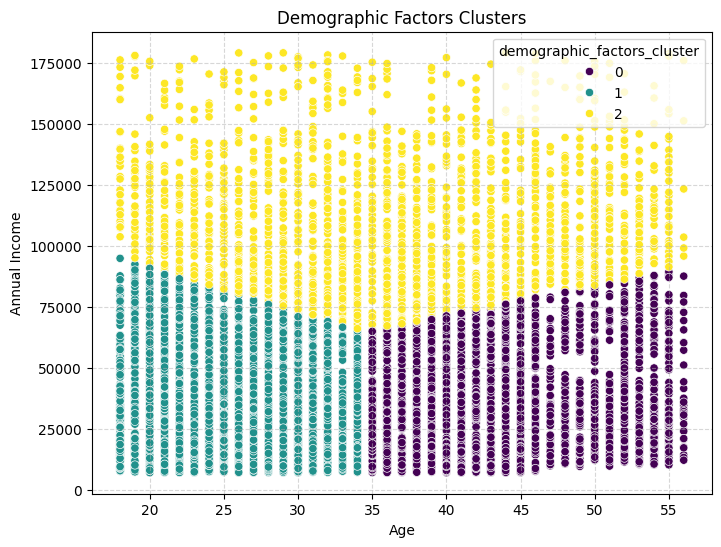

In [788]:
# dataClusters = customerData.copy()
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
dataClusters['demographic_factors_cluster'] = kmeans.fit_predict(demographicFactorsScaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataClusters['age'], y=dataClusters['annual_income'], hue=dataClusters['demographic_factors_cluster'], palette='viridis')
plt.title('Demographic Factors Clusters')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()

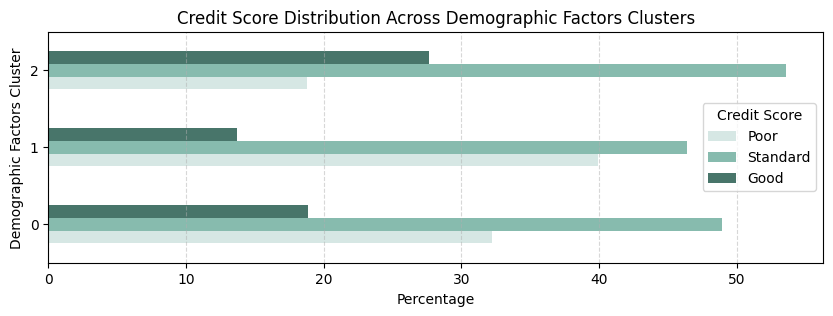

In [789]:
clusterScoreDistribution = pd.crosstab(dataClusters['credit_score'], dataClusters['demographic_factors_cluster'], normalize='columns') * 100

clusterScoreDistribution.T.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distribution Across Demographic Factors Clusters')
plt.xlabel('Percentage')
plt.ylabel('Demographic Factors Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(True, axis='x', linestyle='--', alpha=0.5) 
plt.show()

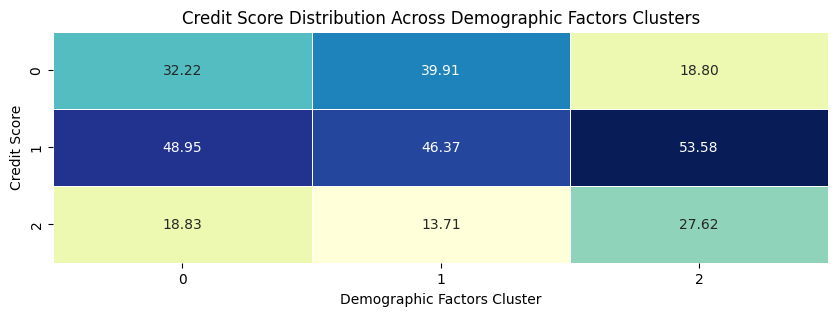

In [790]:
clusterScoreDistribution = clusterScoreDistribution.round(2)

plt.figure(figsize=(10, 3))
sns.heatmap(clusterScoreDistribution, annot=True, cmap='YlGnBu', cbar=False, fmt='.2f', linewidths=.5)

plt.title('Credit Score Distribution Across Demographic Factors Clusters')
plt.xlabel('Demographic Factors Cluster')
plt.ylabel('Credit Score')
plt.show()

Logistic Regression to predict credit score using demographics factors to quantify their impact.

In [791]:
x = customerData[['age', 'annual_income']]
y = customerData['credit_score']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [792]:
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

In [793]:
model = LogisticRegression(multi_class='multinomial')
result = model.fit(xTrain, yTrain)

In [794]:
yPred = model.predict(xTest)
accuracy = accuracy_score(yTest, yPred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 49.35%


In [795]:
classNames = [f"Credit Score {className}" for className in model.classes_]

coefficients_df = pd.DataFrame(
    model.coef_.T, 
    index=x.columns, 
    columns= classNames)

print(coefficients_df)

               Credit Score 0  Credit Score 1  Credit Score 2
age                    -0.185           0.003           0.182
annual_income          -0.284           0.029           0.255


Feature Engineering using PCA on debt management features

In [796]:
scaler = StandardScaler()
debtManagementScaled = scaler.fit_transform(customerData[['outstanding_debt', 'num_of_loan', 'num_credit_card']])

pca = PCA(n_components=1)
debtManagementComponent = pca.fit_transform(debtManagementScaled)
customerData['debtManagementComponent'] = debtManagementComponent
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"PCA Loadings: {pca.components_}")
customerData.head()


Explained Variance Ratio: [0.67607054]
PCA Loadings: [[0.6130833  0.59114397 0.524097  ]]


customer_id  outstanding_debt  num_of_loan  num_credit_card  \
0  CUS_0x1009           202.680            4                5   
1  CUS_0x100b          1030.200            0                4   
2  CUS_0x1011           473.140            3                3   
3  CUS_0x1013          1233.510            3                3   
4  CUS_0x1015           340.220            0                4   

   delay_from_due_date  num_of_delayed_payment  paymentMinAmountNum  age  \
0                    7                      18                    1   26   
1                   13                       7                    0   19   
2                   27                      14                    1   44   
3                   13                       9                    0   44   
4                    8                       9                    1   27   

   annual_income  credit_score  debtManagementComponent  
0          52313             1                   -0.631  
1         113781             0                   -1.427  
2          58918             1                   -1.244  
3          98621             1                   -0.836  
4          46951             2                   -1.797

Feature Engineering using PCA on payment behaviour features

In [797]:
scaler = StandardScaler()
paymentBehaviourScaled = scaler.fit_transform(customerData[['delay_from_due_date', 'num_of_delayed_payment', 'paymentMinAmountNum']])

pca = PCA(n_components=1)
paymentBehaviourComponent = pca.fit_transform(paymentBehaviourScaled)
customerData['paymentBehaviourComponent'] = paymentBehaviourComponent
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"PCA Loadings: {pca.components_}")
customerData.head()

Explained Variance Ratio: [0.69227479]
PCA Loadings: [[0.56370799 0.59153227 0.57647452]]


customer_id  outstanding_debt  num_of_loan  num_credit_card  \
0  CUS_0x1009           202.680            4                5   
1  CUS_0x100b          1030.200            0                4   
2  CUS_0x1011           473.140            3                3   
3  CUS_0x1013          1233.510            3                3   
4  CUS_0x1015           340.220            0                4   

   delay_from_due_date  num_of_delayed_payment  paymentMinAmountNum  age  \
0                    7                      18                    1   26   
1                   13                       7                    0   19   
2                   27                      14                    1   44   
3                   13                       9                    0   44   
4                    8                       9                    1   27   

   annual_income  credit_score  debtManagementComponent  \
0          52313             1                   -0.631   
1         113781             0                   -1.427   
2          58918             1                   -1.244   
3          98621             1                   -0.836   
4          46951             2                   -1.797   

   paymentBehaviourComponent  
0                      0.384  
1                     -1.630  
2                      0.768  
3                     -1.435  
4                     -0.456

Feature Engineering using PCA on demographic features

In [798]:
scaler = StandardScaler()
demographicFactorsScaled = scaler.fit_transform(customerData[['age', 'annual_income']])

pca = PCA(n_components=1)
demographicFactorsComponent = pca.fit_transform(demographicFactorsScaled)
customerData['demographicFactorsComponent'] = demographicFactorsComponent
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"PCA Loadings: {pca.components_}")
customerData.head()

Explained Variance Ratio: [0.53652232]
PCA Loadings: [[0.70710678 0.70710678]]


customer_id  outstanding_debt  num_of_loan  num_credit_card  \
0  CUS_0x1009           202.680            4                5   
1  CUS_0x100b          1030.200            0                4   
2  CUS_0x1011           473.140            3                3   
3  CUS_0x1013          1233.510            3                3   
4  CUS_0x1015           340.220            0                4   

   delay_from_due_date  num_of_delayed_payment  paymentMinAmountNum  age  \
0                    7                      18                    1   26   
1                   13                       7                    0   19   
2                   27                      14                    1   44   
3                   13                       9                    0   44   
4                    8                       9                    1   27   

   annual_income  credit_score  debtManagementComponent  \
0          52313             1                   -0.631   
1         113781             0                   -1.427   
2          58918             1                   -1.244   
3          98621             1                   -0.836   
4          46951             2                   -1.797   

   paymentBehaviourComponent  demographicFactorsComponent  
0                      0.384                       -0.518  
1                     -1.630                        0.167  
2                      0.768                        0.881  
3                     -1.435                        1.643  
4                     -0.456                       -0.550

Since the explained variance ratio is low, we will do feature engineering using weighted sum

In [799]:
customerData['debtManagementCombined'] = (
    0.4 * debtManagementScaled[:, 0] + 
    0.3 * debtManagementScaled[:, 1] +
    0.3 * debtManagementScaled[:, 2]
)

customerData['paymentBehaviourCombined'] = (
    0.3 * paymentBehaviourScaled[:, 0] + 
    0.3 * paymentBehaviourScaled[:, 1] +
    0.4 * paymentBehaviourScaled[:, 2]
)

customerData['demographicFactorsCombined'] = (
    0.5 * demographicFactorsScaled[:, 0] + 
    0.5 * demographicFactorsScaled[:, 1]
)

customerData.head()

customer_id  outstanding_debt  num_of_loan  num_credit_card  \
0  CUS_0x1009           202.680            4                5   
1  CUS_0x100b          1030.200            0                4   
2  CUS_0x1011           473.140            3                3   
3  CUS_0x1013          1233.510            3                3   
4  CUS_0x1015           340.220            0                4   

   delay_from_due_date  num_of_delayed_payment  paymentMinAmountNum  age  \
0                    7                      18                    1   26   
1                   13                       7                    0   19   
2                   27                      14                    1   44   
3                   13                       9                    0   44   
4                    8                       9                    1   27   

   annual_income  credit_score  debtManagementComponent  \
0          52313             1                   -0.631   
1         113781             0                   -1.427   
2          58918             1                   -1.244   
3          98621             1                   -0.836   
4          46951             2                   -1.797   

   paymentBehaviourComponent  demographicFactorsComponent  \
0                      0.384                       -0.518   
1                     -1.630                        0.167   
2                      0.768                        0.881   
3                     -1.435                        1.643   
4                     -0.456                       -0.550   

   debtManagementCombined  paymentBehaviourCombined  \
0                  -0.422                     0.270   
1                  -0.778                    -0.964   
2                  -0.746                     0.485   
3                  -0.479                    -0.865   
4                  -1.020                    -0.154   

   demographicFactorsCombined  
0                      -0.366  
1                       0.118  
2                       0.623  
3                       1.162  
4                      -0.389

K Mean Clustering for Customer Segmentation using feature engineered debt management, payment behaviour and demographic factors

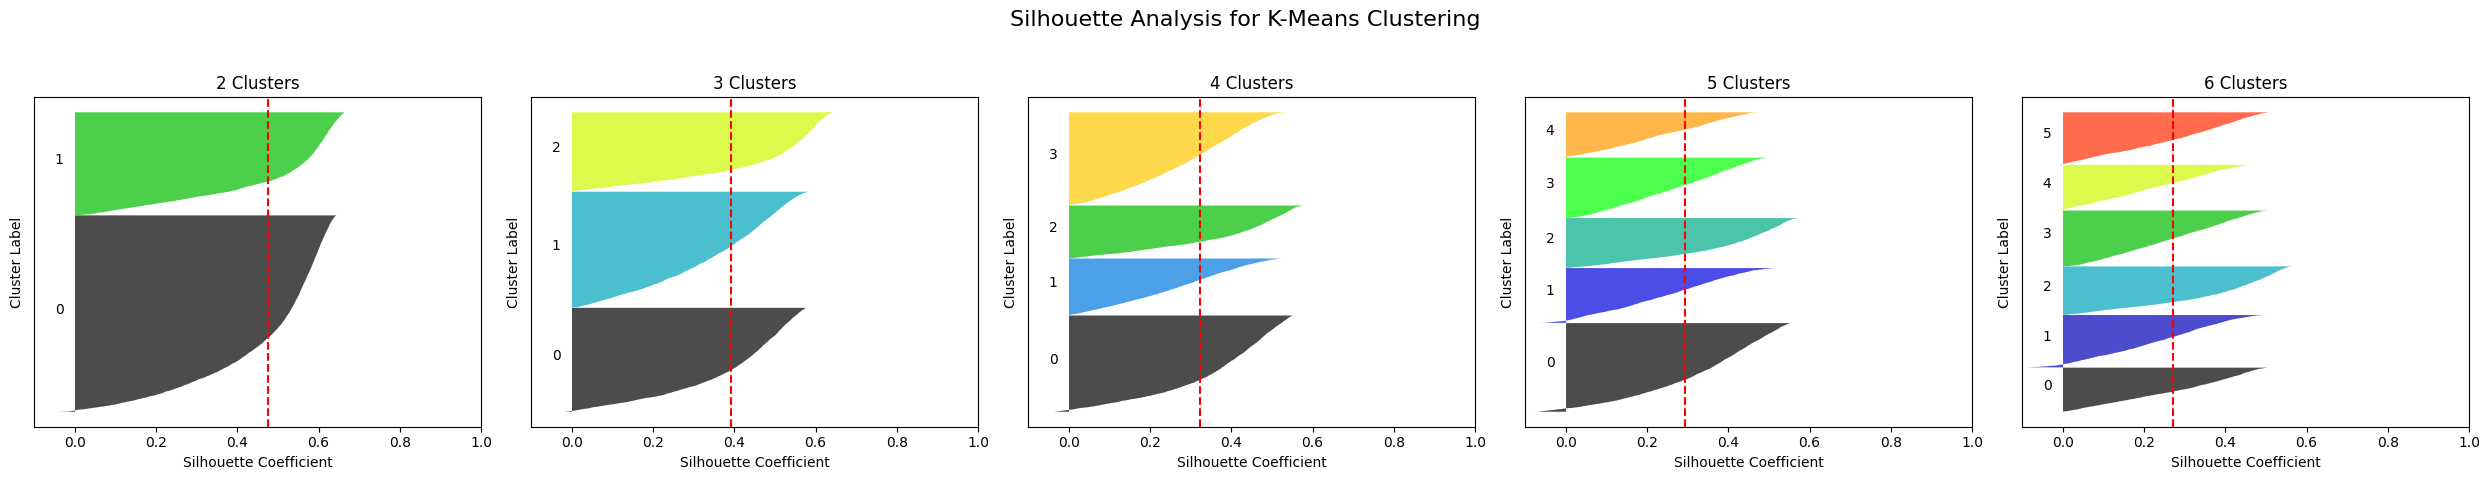

In [800]:
features = customerData[['debtManagementComponent', 'paymentBehaviourComponent', 'demographicFactorsCombined']]

clusterRange = range(2, 7)  
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle("Silhouette Analysis for K-Means Clustering", fontsize=16)

for i, nClusters in enumerate(clusterRange):
    ax = axes[i]
    kmeans = KMeans(n_clusters=nClusters, random_state=42, n_init='auto')
    clusterLabels = kmeans.fit_predict(features)
    silhouetteAvg = silhouette_score(features, clusterLabels)
    silhouetteValues = silhouette_samples(features, clusterLabels)
    y_lower = 10
    for i in range(nClusters):
        ithClusterSilhouetteValues = silhouetteValues[clusterLabels == i]
        ithClusterSilhouetteValues.sort()
        size_cluster_i = ithClusterSilhouetteValues.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / nClusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ithClusterSilhouetteValues, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{nClusters} Clusters")
    ax.axvline(x=silhouetteAvg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_xlim([-0.1, 1])
    ax.set_ylabel("Cluster Label")
    ax.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



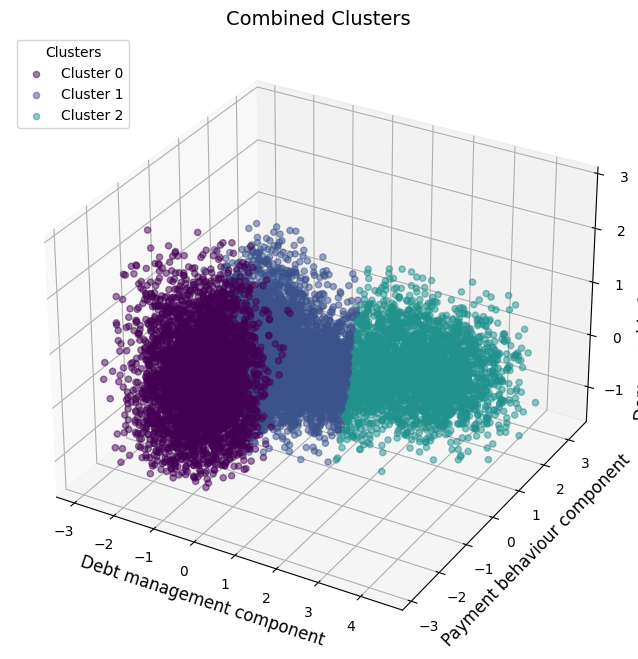

In [801]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
dataClusters = customerData.copy()
dataClusters['combined_cluster'] = kmeans.fit_predict(features)

colours = cm.viridis(np.linspace(0, 1, 5))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

for cluster in range(3):
    clusterData = dataClusters[dataClusters['combined_cluster'] == cluster]
    ax.scatter(
        clusterData['debtManagementComponent'], 
        clusterData['paymentBehaviourComponent'], 
        clusterData['demographicFactorsCombined'], 
        color=colours[cluster], 
        label=f'Cluster {cluster}', 
        s=20, 
        alpha=0.5
    )

ax.set_title('Combined Clusters', fontsize=14)
ax.set_xlabel('Debt management component', fontsize=12)
ax.set_ylabel('Payment behaviour component', fontsize=12)
ax.set_zlabel('Demographic factors combined', fontsize=12)
ax.legend(title='Clusters', loc='upper left', fontsize=10)
plt.show()

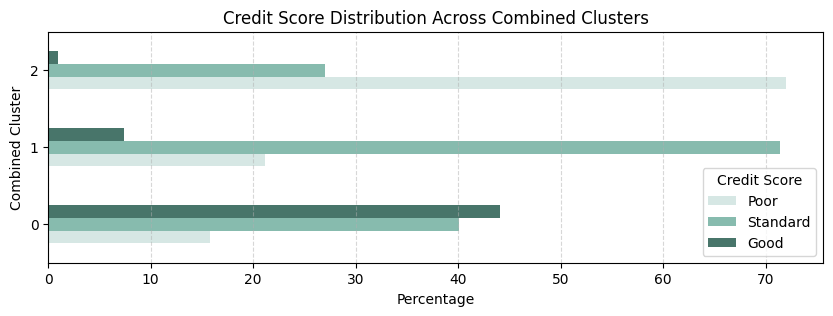

In [802]:
clusterScoreDistribution = pd.crosstab(dataClusters['credit_score'], dataClusters['combined_cluster'], normalize='columns') * 100

clusterScoreDistribution.T.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distribution Across Combined Clusters')
plt.xlabel('Percentage')
plt.ylabel('Combined Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(True, axis='x', linestyle='--', alpha=0.5) 
plt.show()

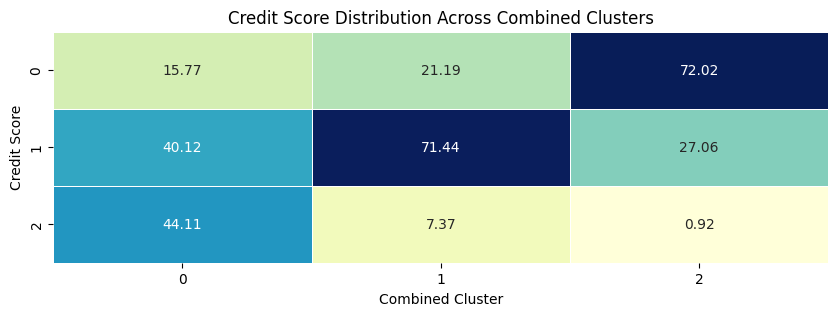

In [803]:
clusterScoreDistribution = clusterScoreDistribution.round(2)

plt.figure(figsize=(10, 3))
sns.heatmap(clusterScoreDistribution, annot=True, cmap='YlGnBu', cbar=False, fmt='.2f', linewidths=.5)

plt.title('Credit Score Distribution Across Combined Clusters')
plt.xlabel('Combined Cluster')
plt.ylabel('Credit Score')
plt.show()

Logistic Regression across featured engineered debt management, payment behaviour and demographic factors

In [804]:
x = customerData[['debtManagementComponent', 'paymentBehaviourComponent', 'demographicFactorsCombined']]
# x = customerData[['debtManagementCombined', 'paymentBehaviourCombined', 'demographicFactorsCombined']]
y = customerData['credit_score']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [805]:
model = LogisticRegression(multi_class='multinomial')
result = model.fit(xTrain, yTrain)

In [806]:
yPred = model.predict(xTest)
accuracy = accuracy_score(yTest, yPred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 66.65%


In [807]:
classNames = [f"Credit Score {className}" for className in model.classes_]

coefficients_df = pd.DataFrame(
    model.coef_.T, 
    index=x.columns, 
    columns= classNames)

print(coefficients_df)

                            Credit Score 0  Credit Score 1  Credit Score 2
debtManagementComponent              0.483          -0.084          -0.399
paymentBehaviourComponent            0.410           0.328          -0.738
demographicFactorsCombined          -0.015           0.048          -0.032
